In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Column names from the word document "Network Anamoly Detection" for the dataset
column_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

dataset = pd.read_csv("../../Data/Train.txt", names=column_names)
dataset.head()

labels, values = np.unique(dataset['attack'], return_counts=True)

In [2]:
def show_feature_in_relation_to_attack_bar_chart(labels, feature, xlabel, ylabel):
    for label in labels:
        title = f"Bar chart of {feature} and their occurrences for the attack class '{label}'"
        l, v = np.unique(dataset[dataset['attack'] == label][feature], return_counts=True)
        
        graphs = max(round(len(l)/20), 1)
        
        labels_split = np.array_split(l, graphs)
        values_split = np.array_split(v, graphs)
        
        # all_values_split = np.array_split(values, graphs)
        
        for index in range(len(labels_split)):
            fig, ax = plt.subplots()
            ax.barh(labels_split[index], values_split[index], align="center")
            # ax.barh(labels_split[index], v, align="center")
            ax.set_xlabel(xlabel)
            ax.set_ylabel(ylabel)
            # ax.xlabel(xlabel)
            # ax.ylabel(ylabel)
            # fig.title(title)
            if len(labels_split) > 1:
                ax.set_title(f"{title} part {index+1}")
            else:
                ax.set_title(title)
            fig.show()

/tmp/ipykernel_4819/2716826374.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_4819/2716826374.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


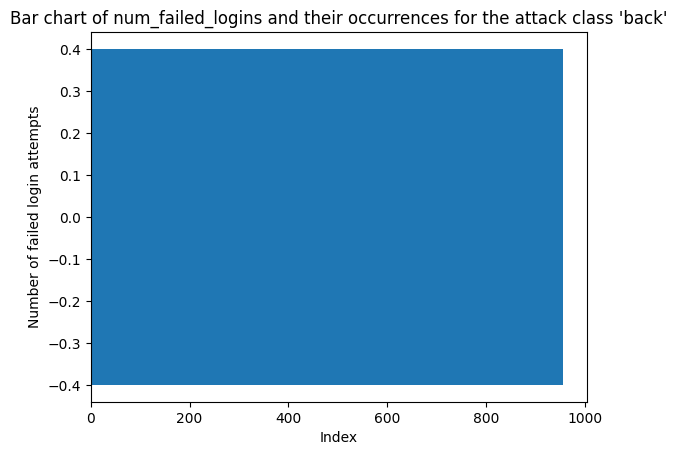

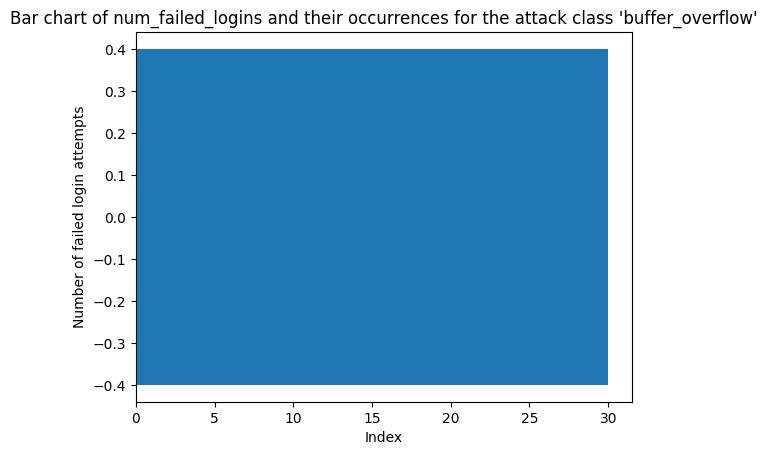

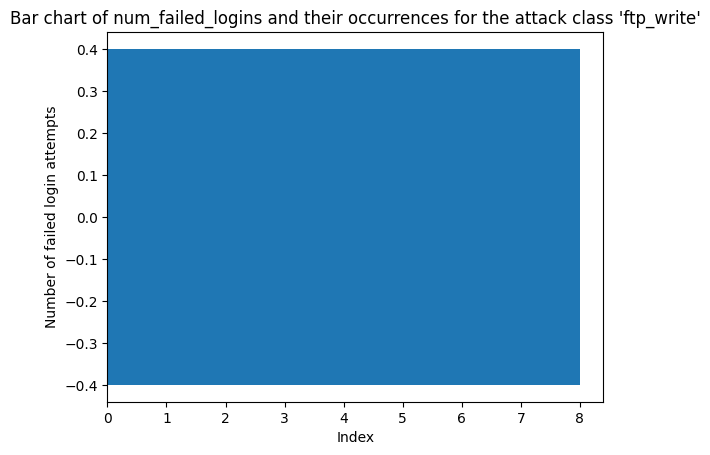

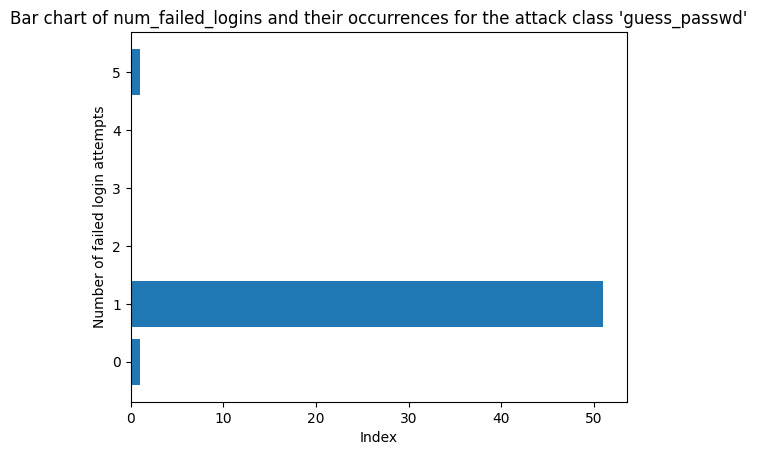

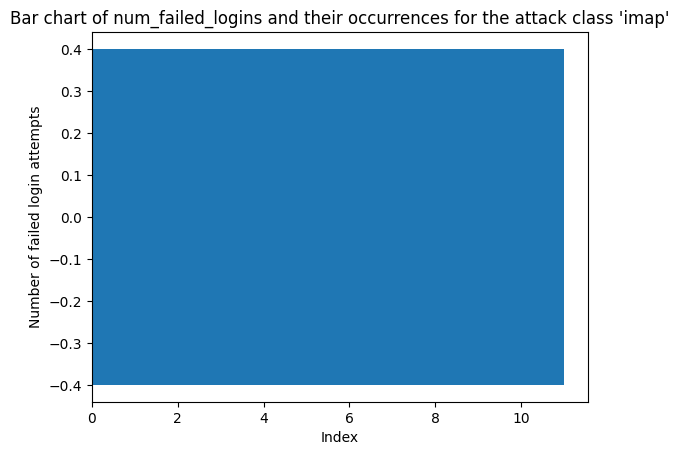

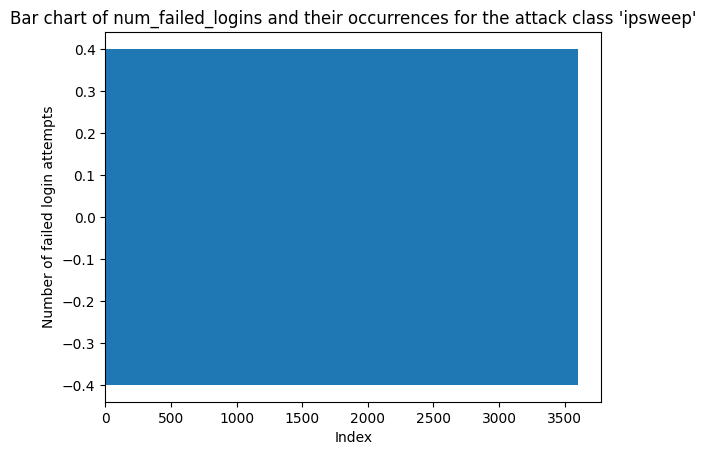

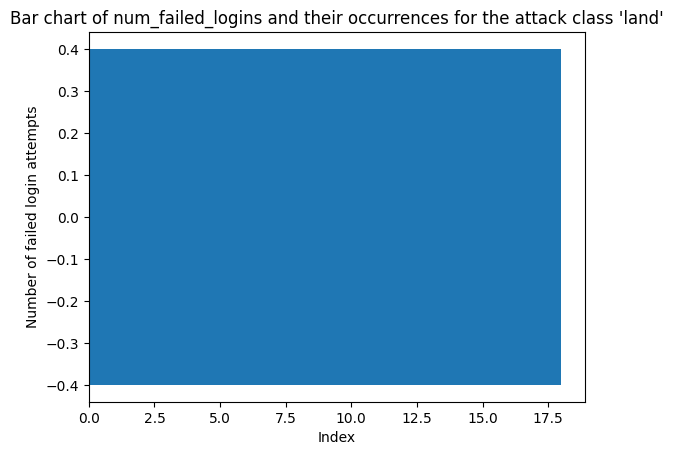

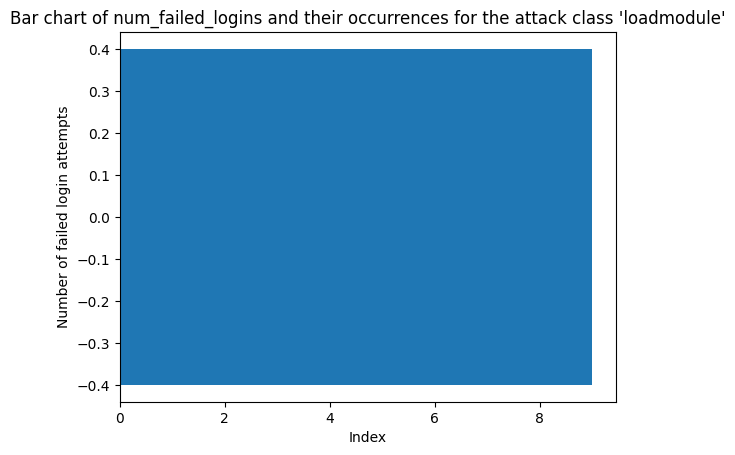

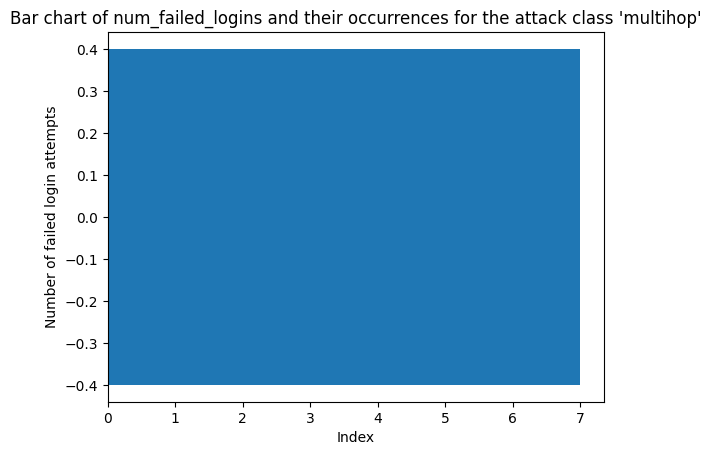

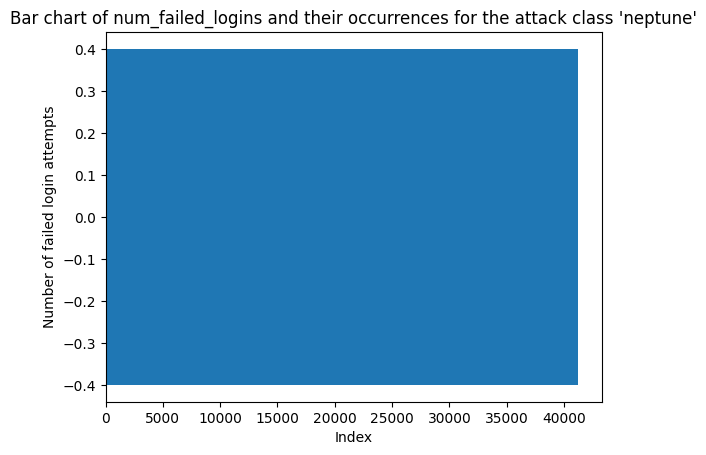

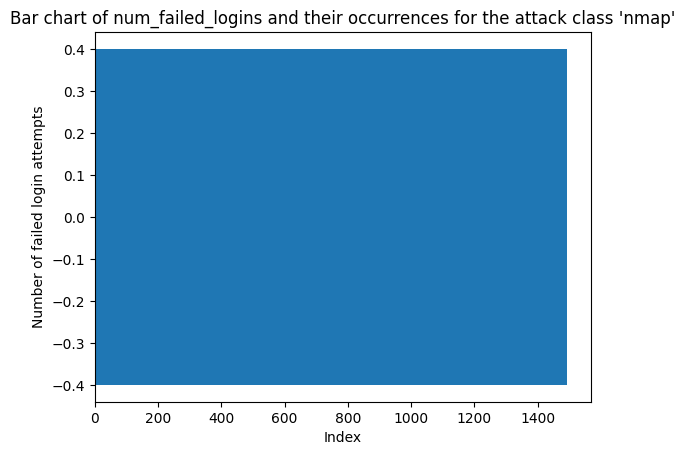

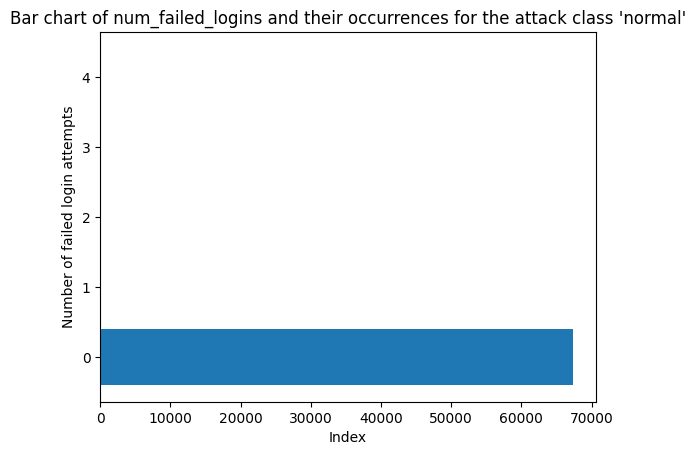

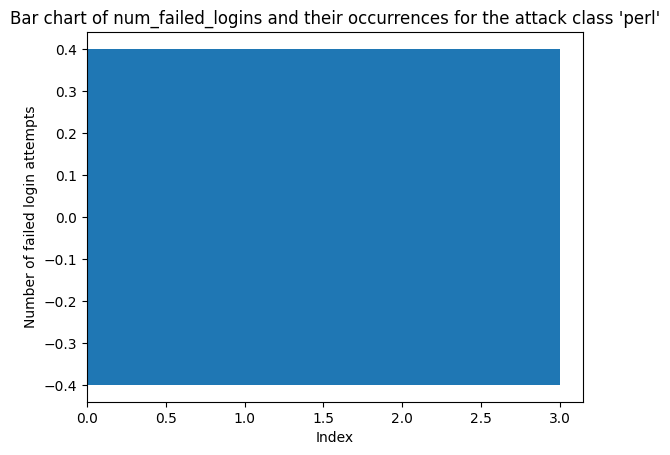

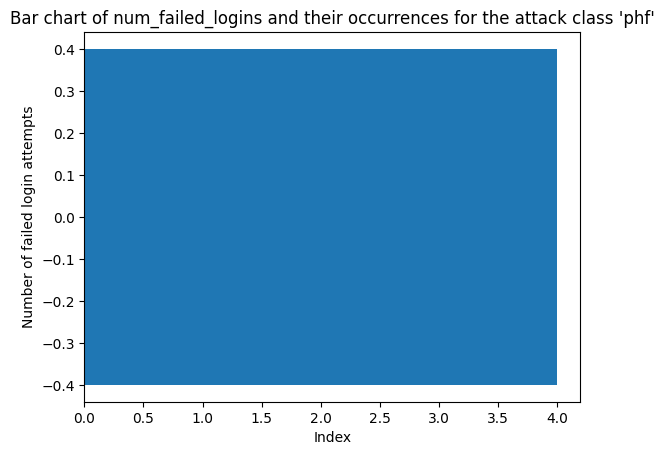

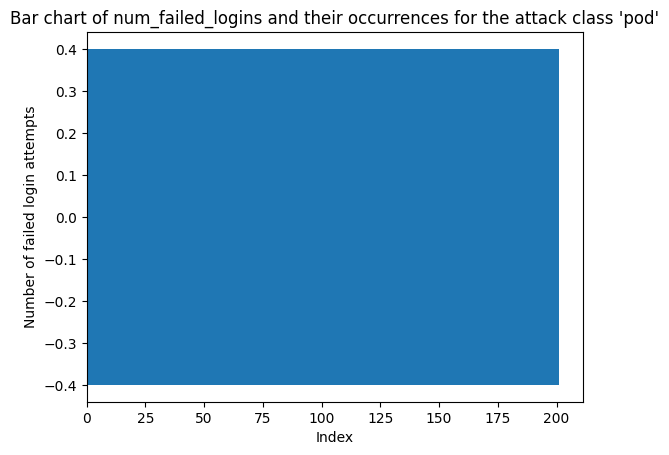

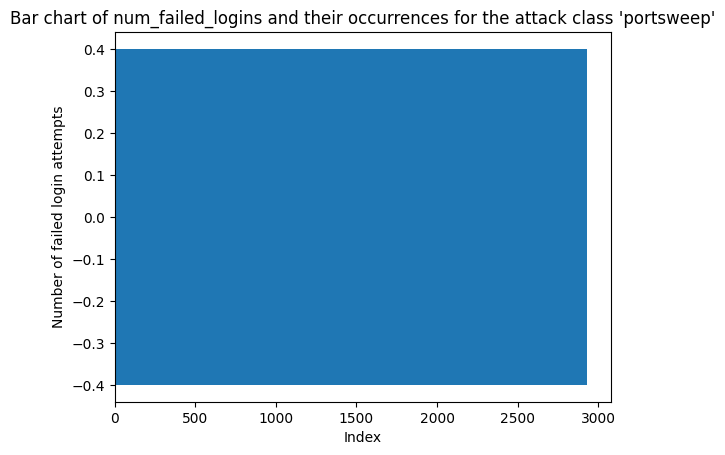

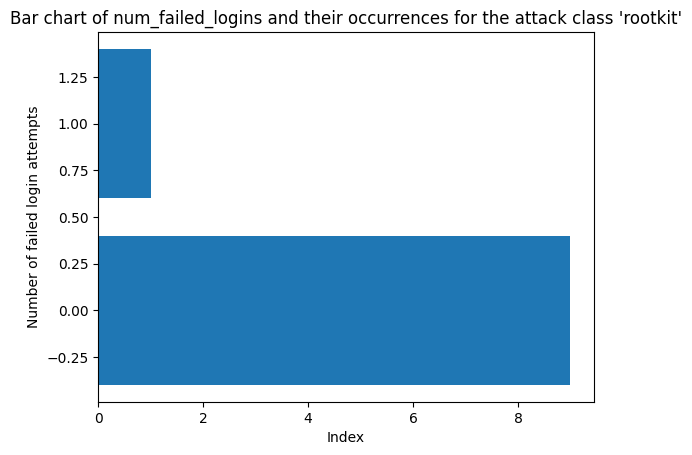

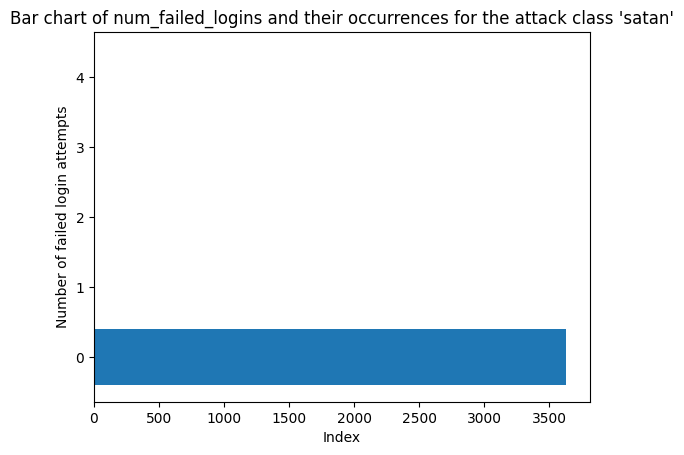

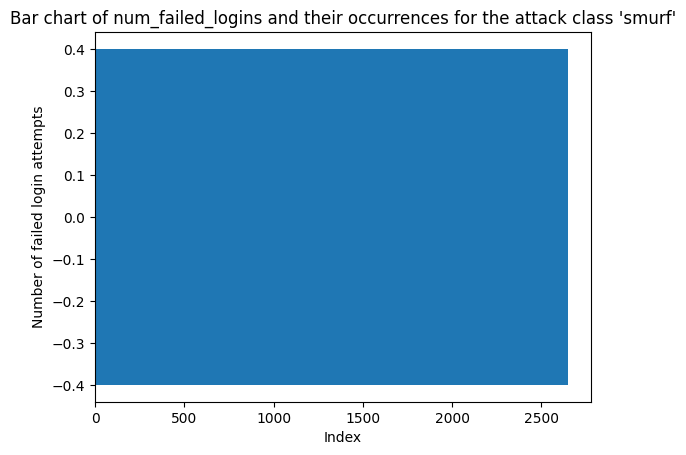

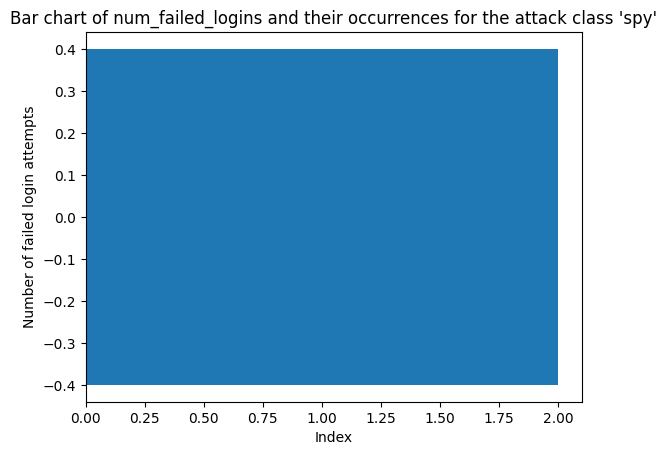

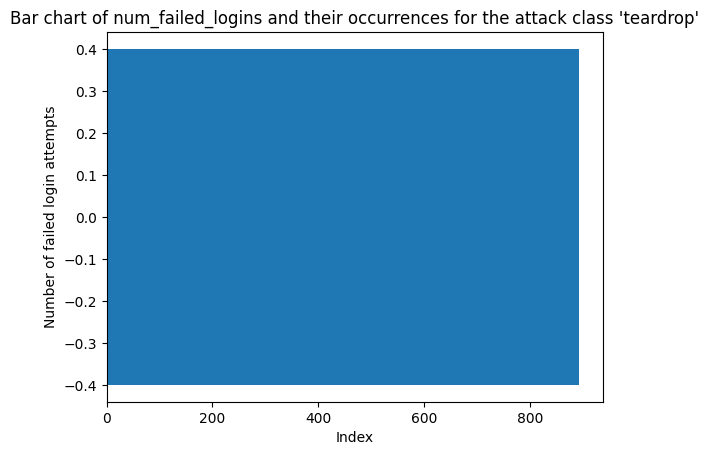

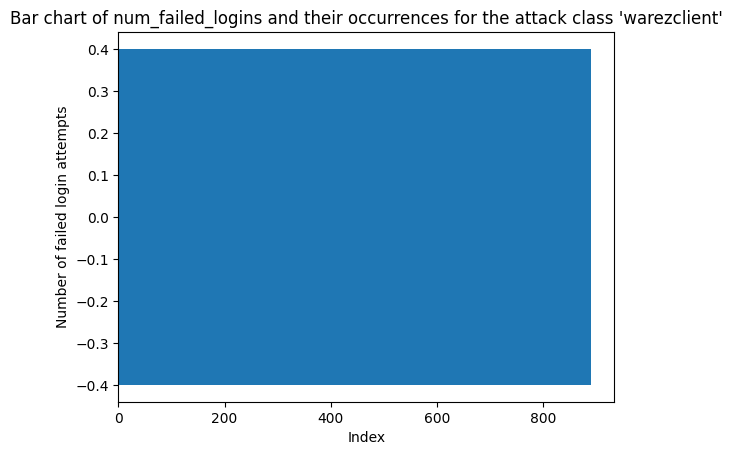

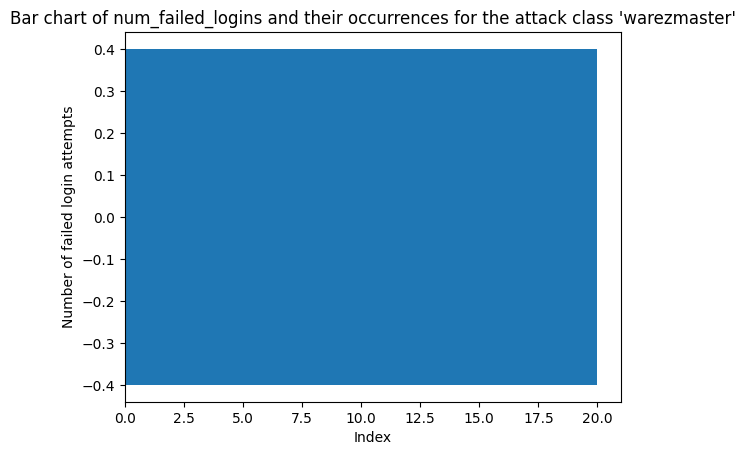

In [4]:
# Guesspasswd has a high likelyhood of having on failed login.
show_feature_in_relation_to_attack_bar_chart(labels, "num_failed_logins", "Index", "Number of failed login attempts")

/tmp/ipykernel_4819/2716826374.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_4819/2716826374.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


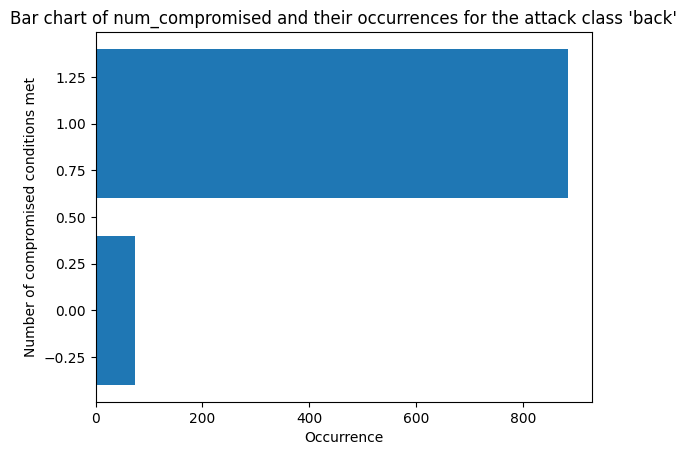

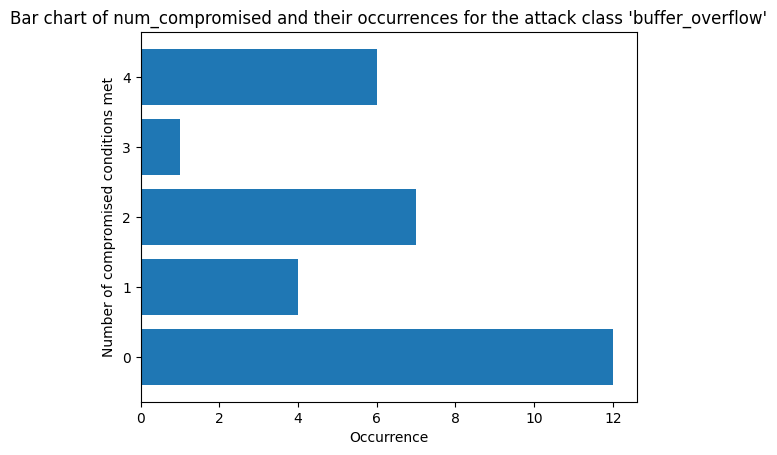

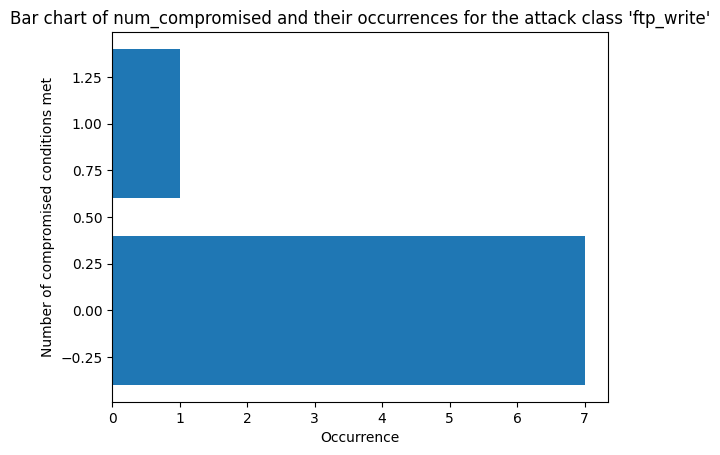

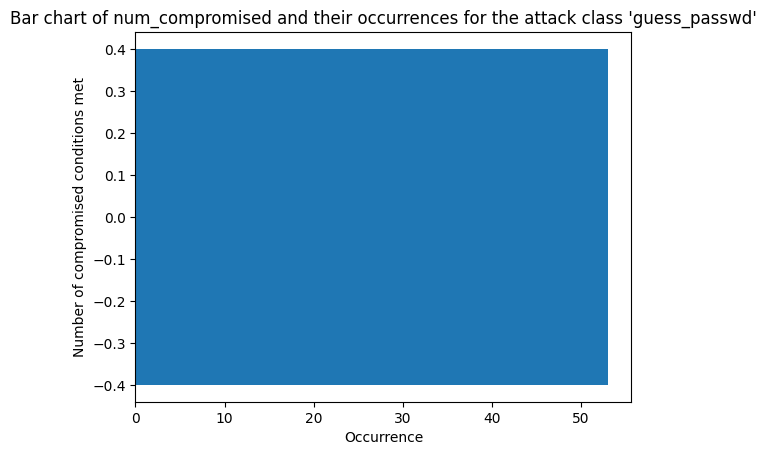

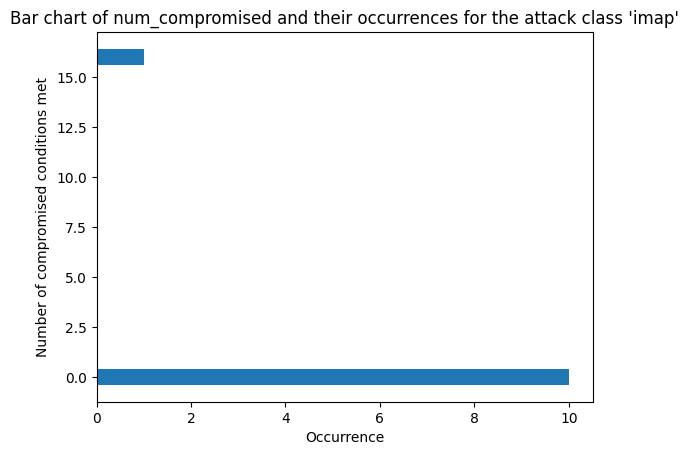

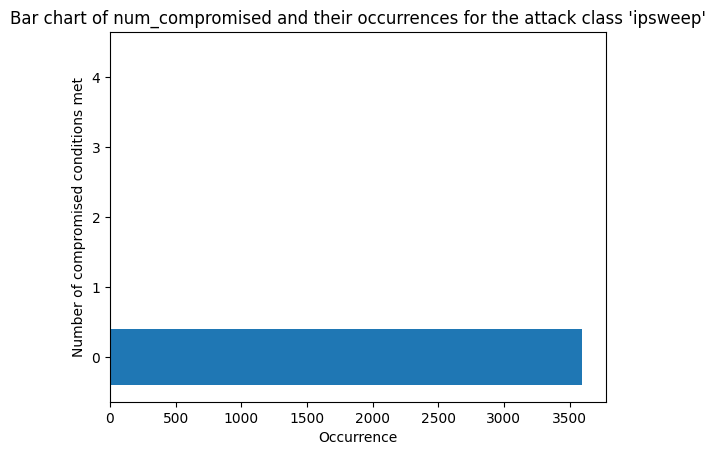

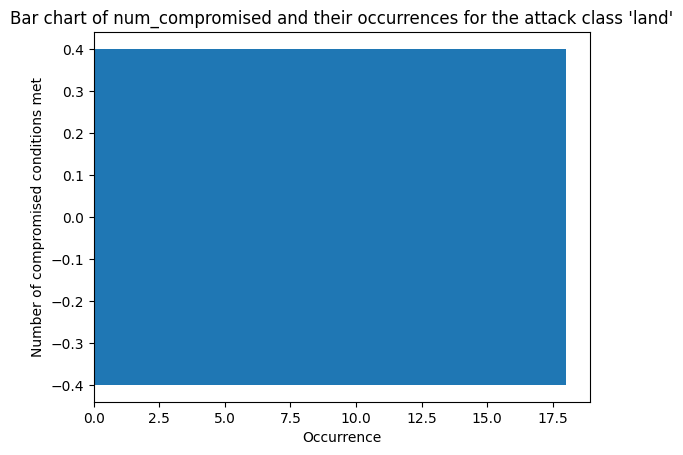

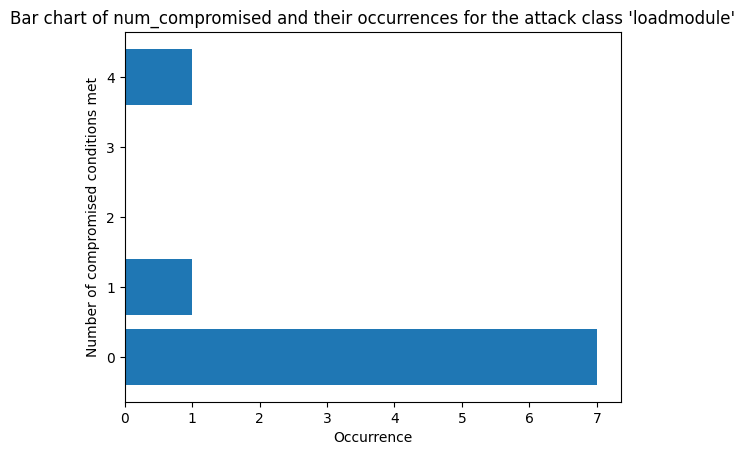

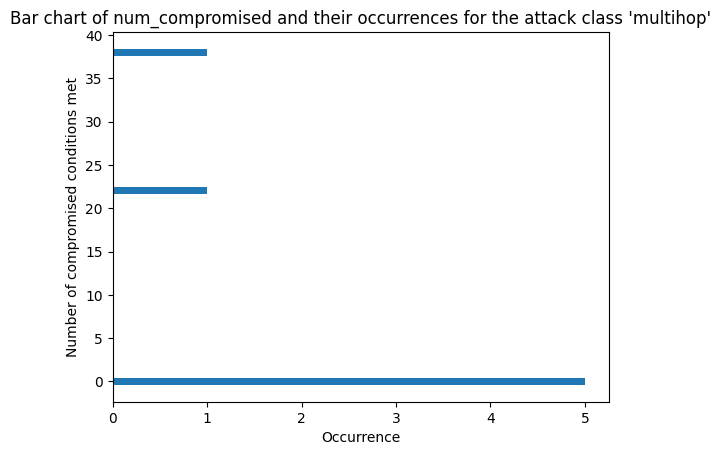

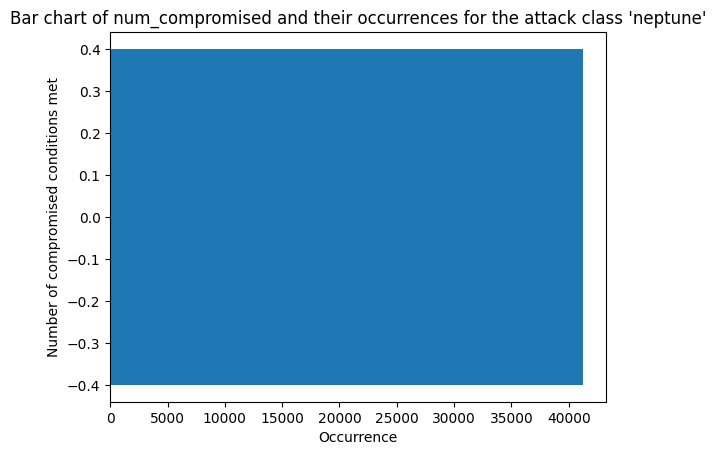

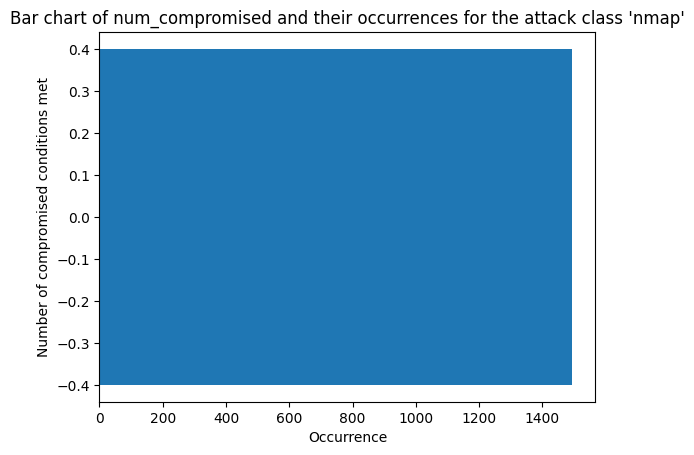

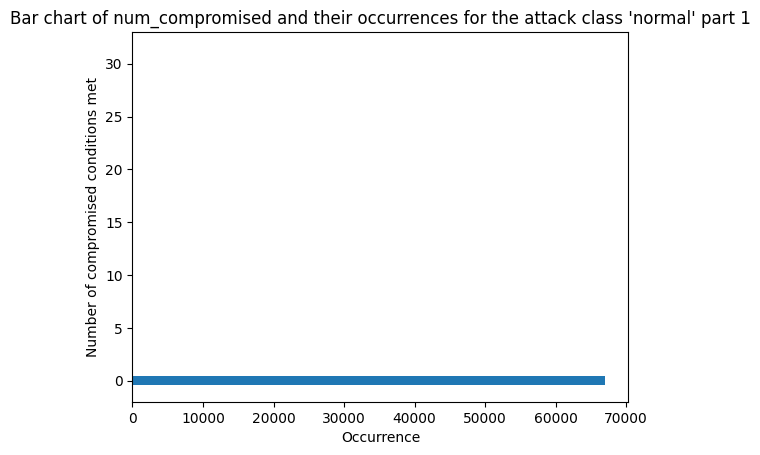

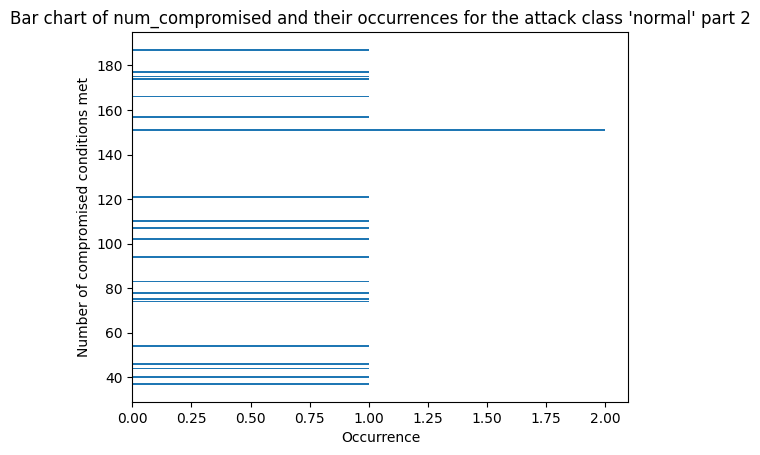

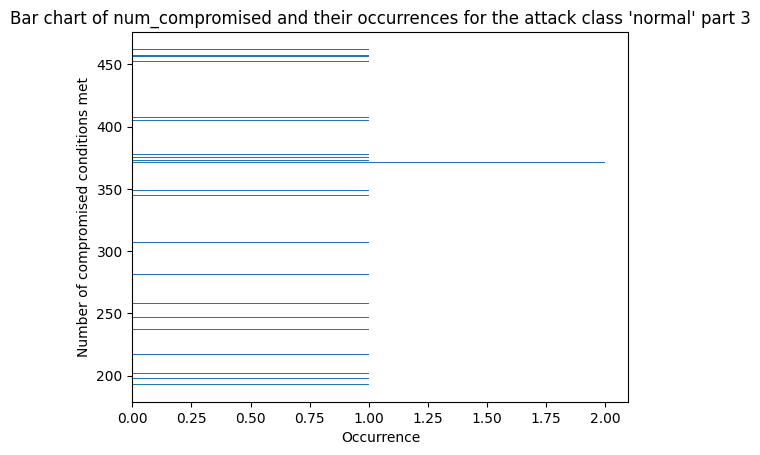

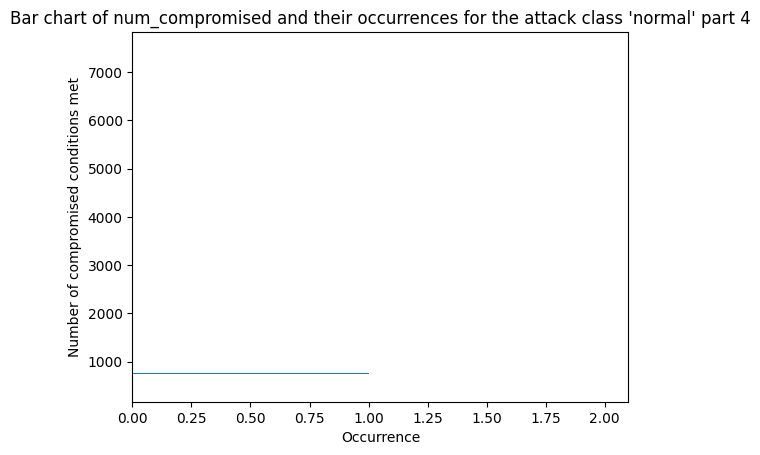

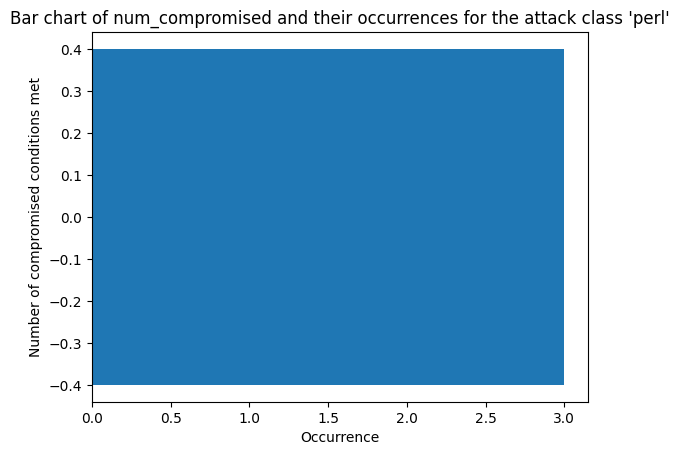

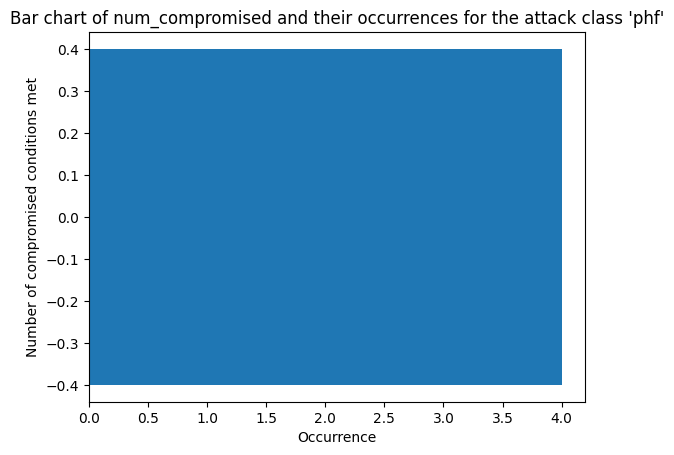

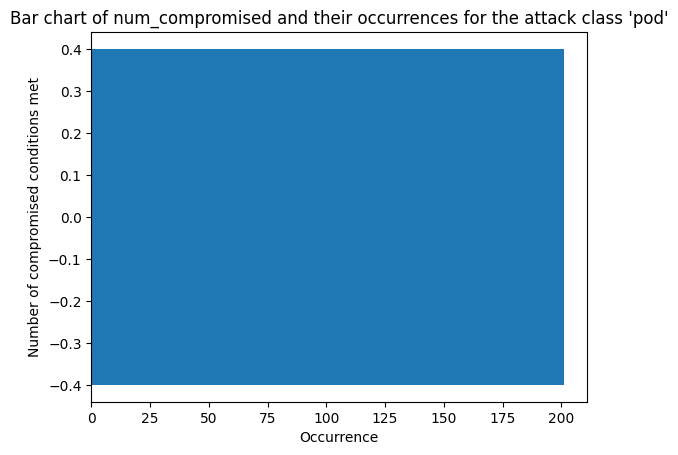

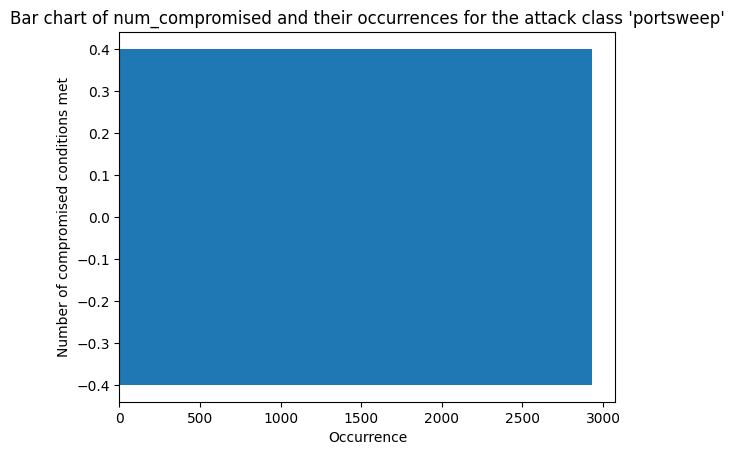

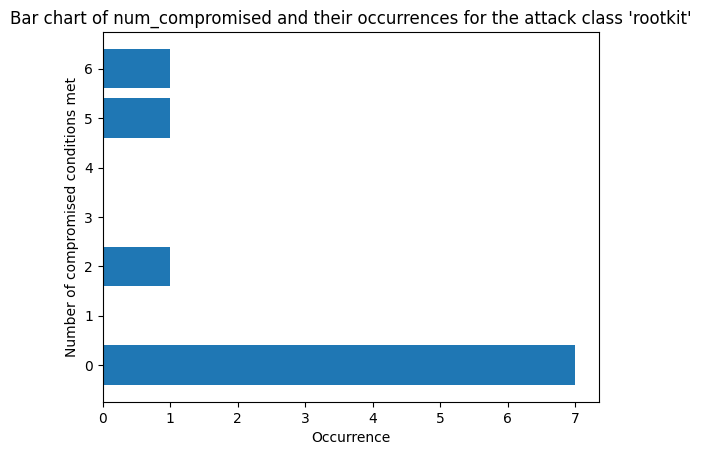

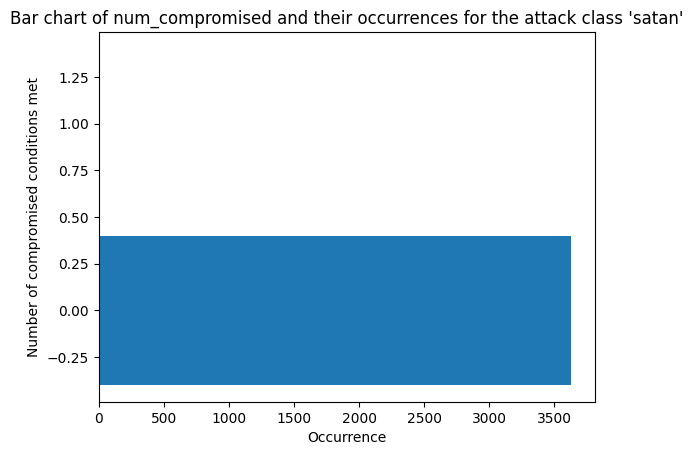

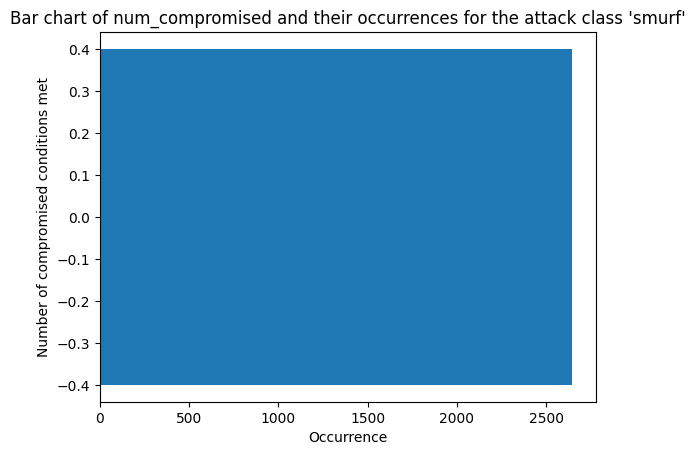

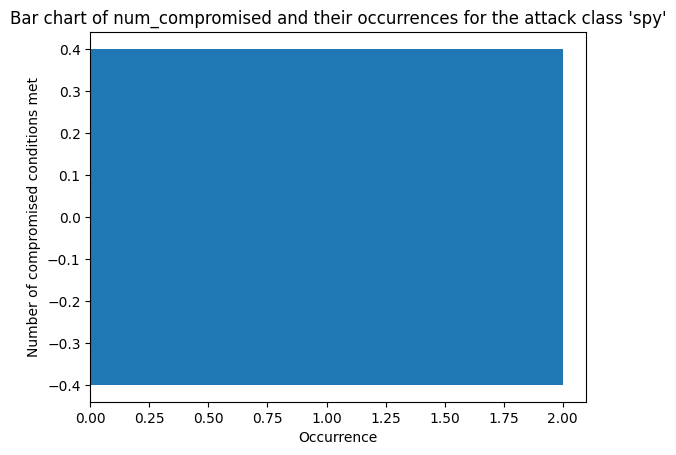

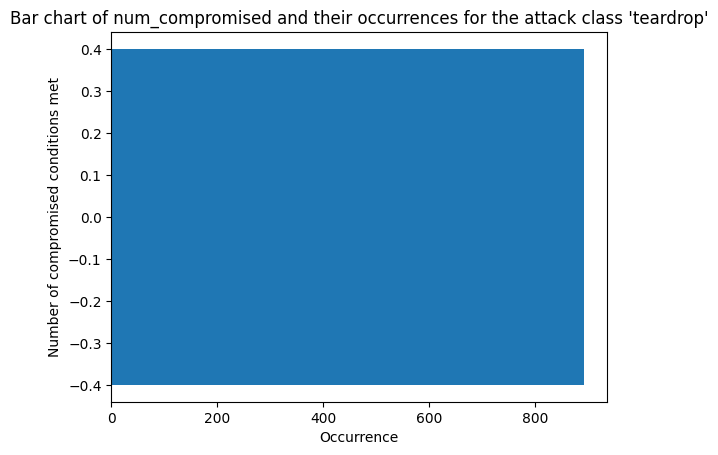

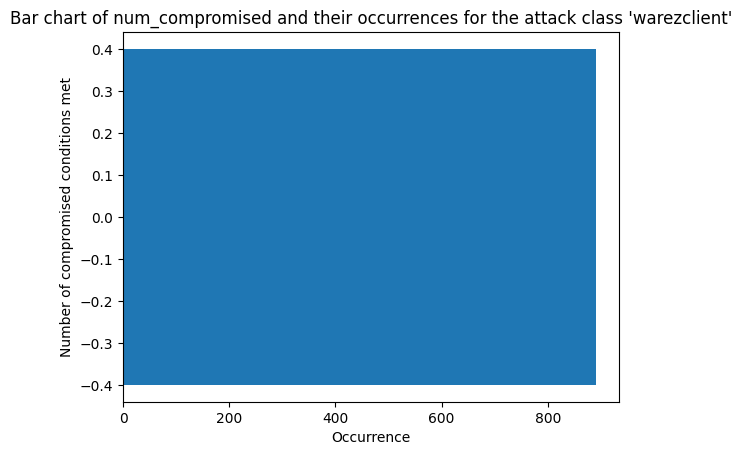

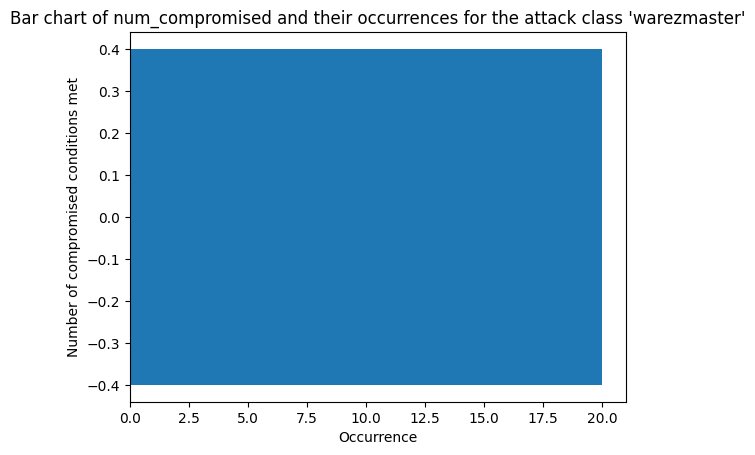

In [5]:
# Close to zero compromised conditions met but not zero can indicate an attack.
show_feature_in_relation_to_attack_bar_chart(labels, "num_compromised", "Occurrence", "Number of compromised conditions met")

/tmp/ipykernel_4819/2716826374.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_4819/2716826374.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


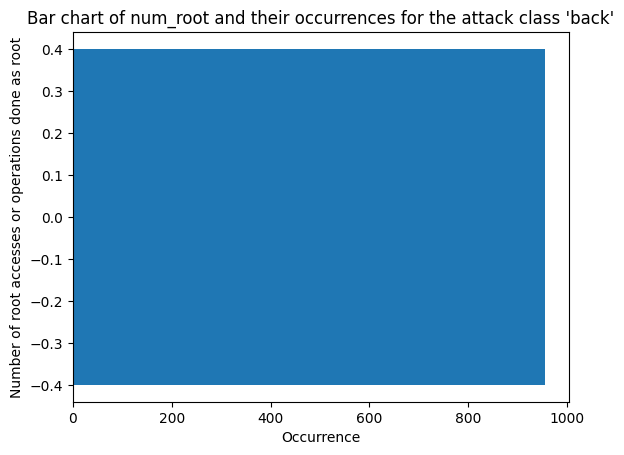

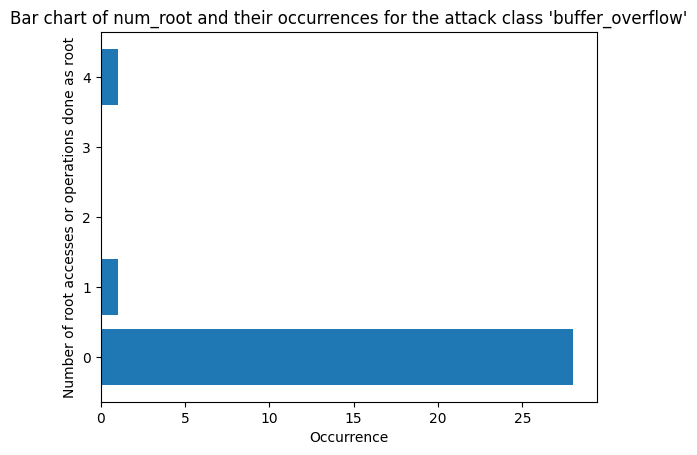

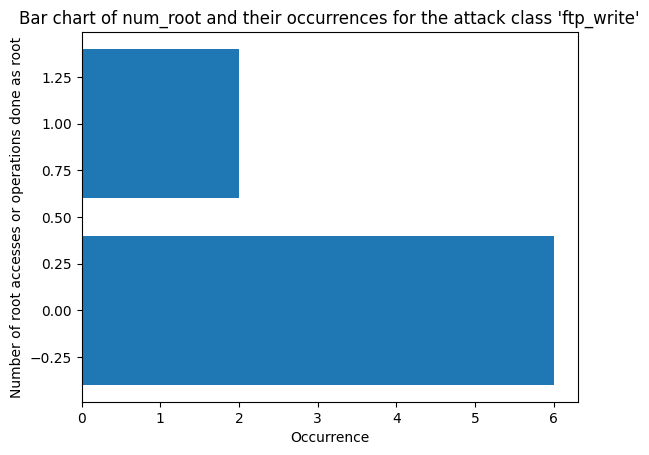

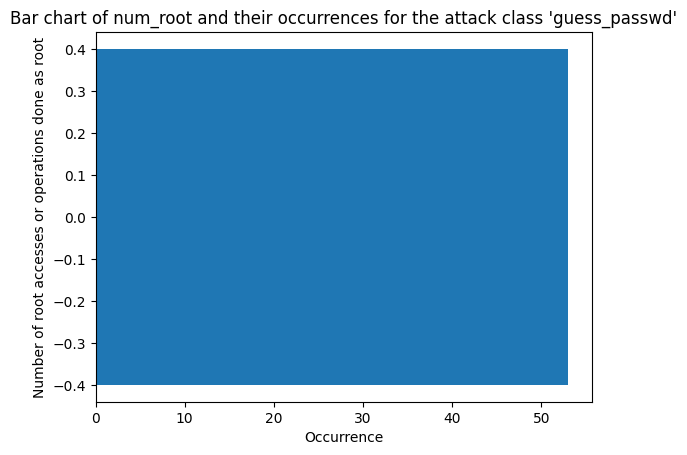

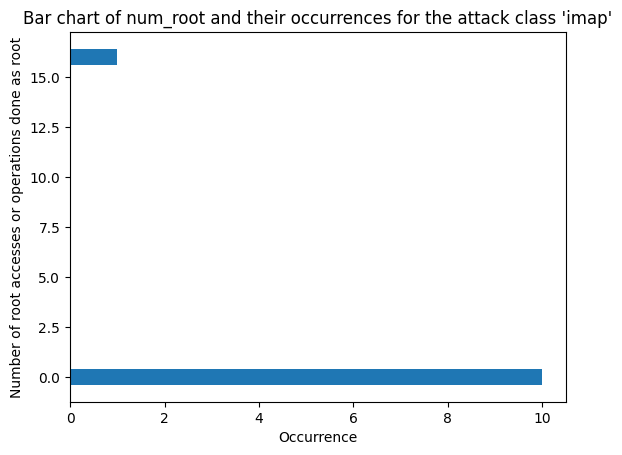

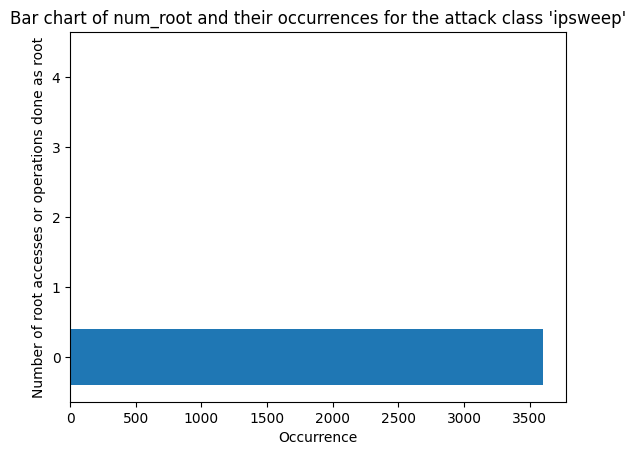

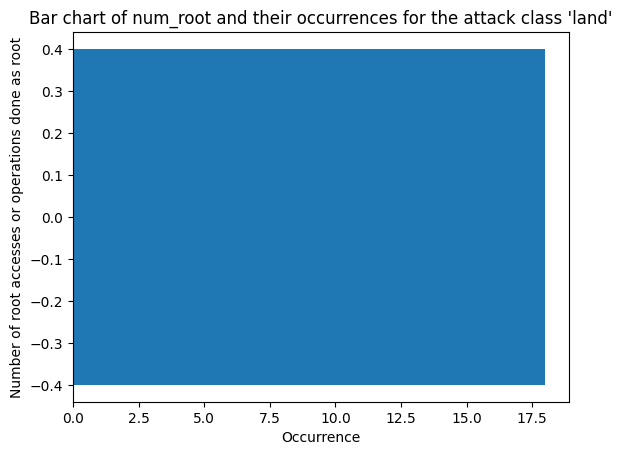

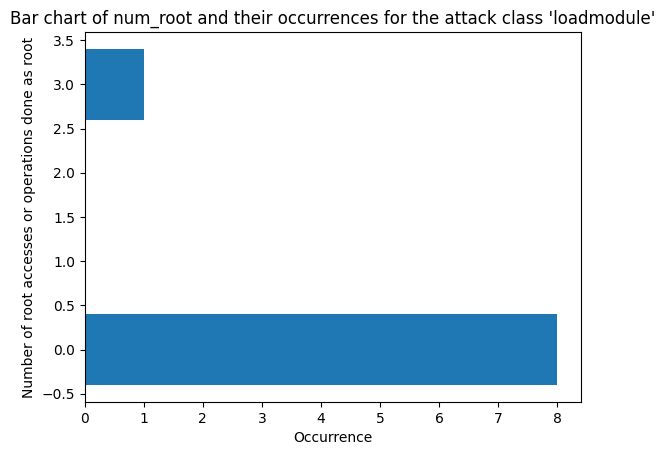

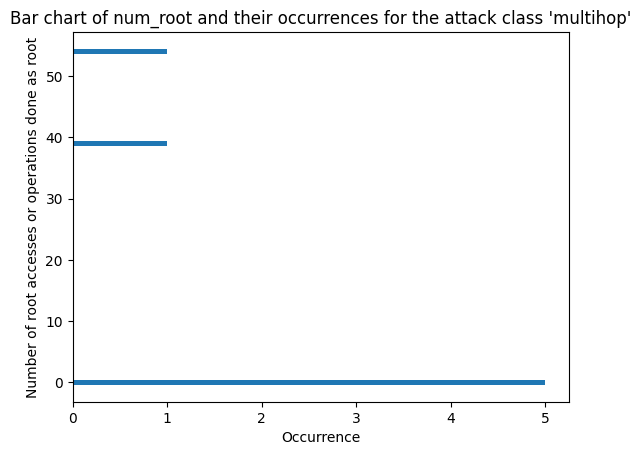

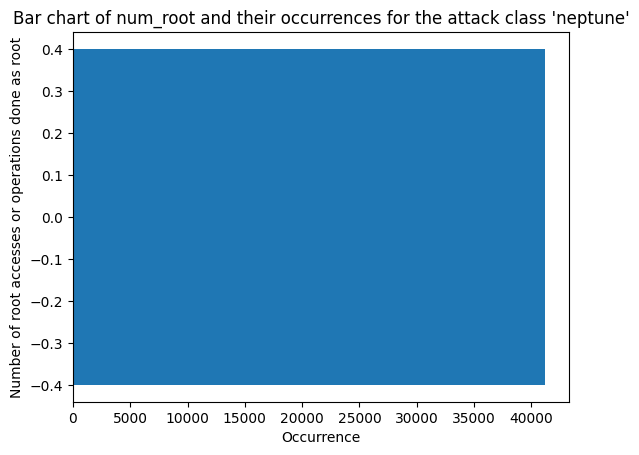

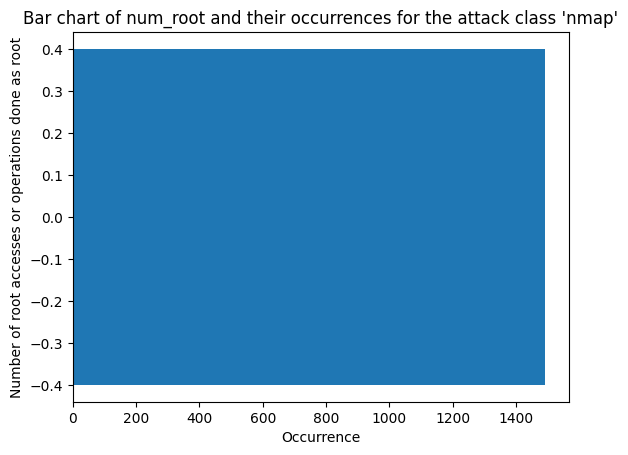

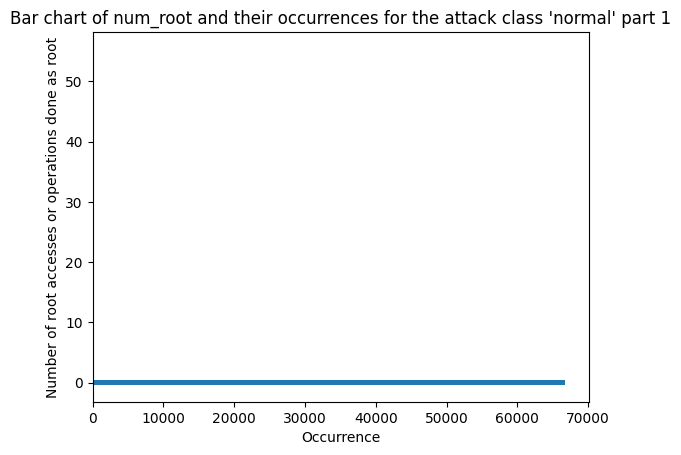

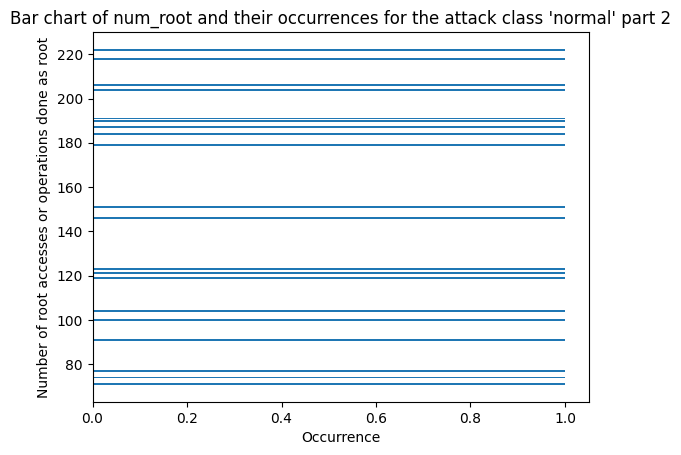

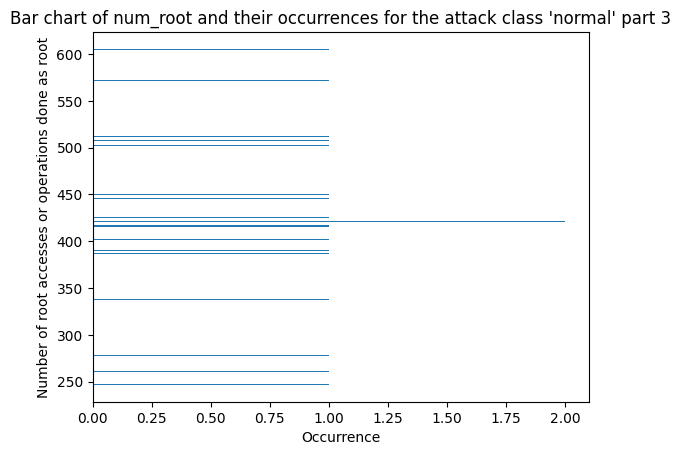

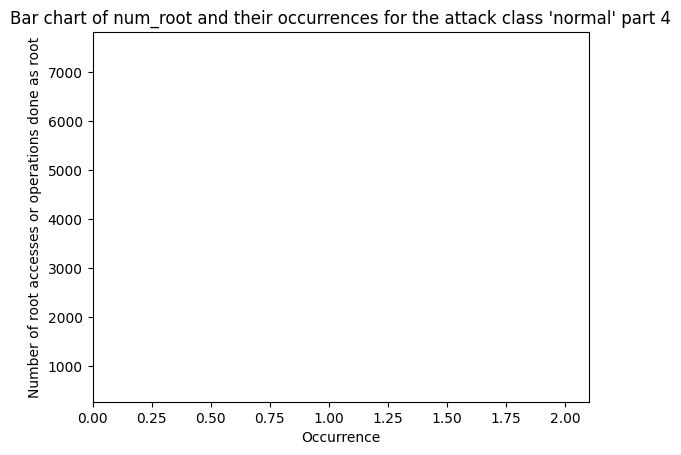

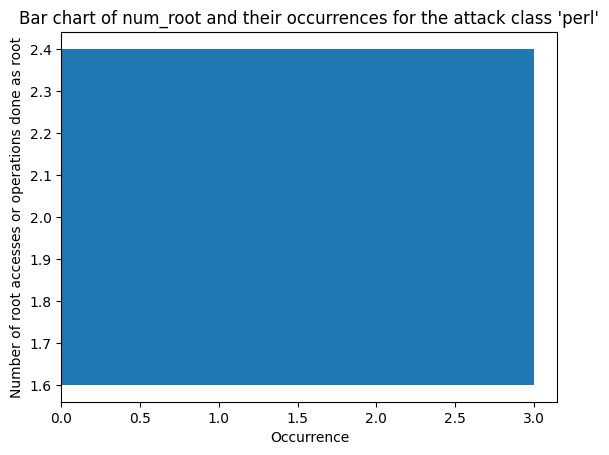

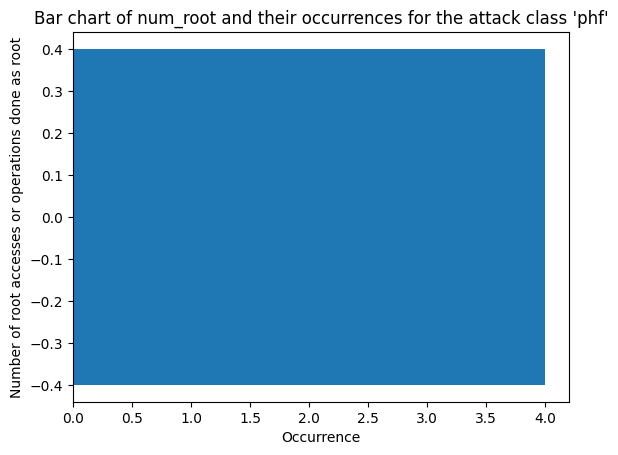

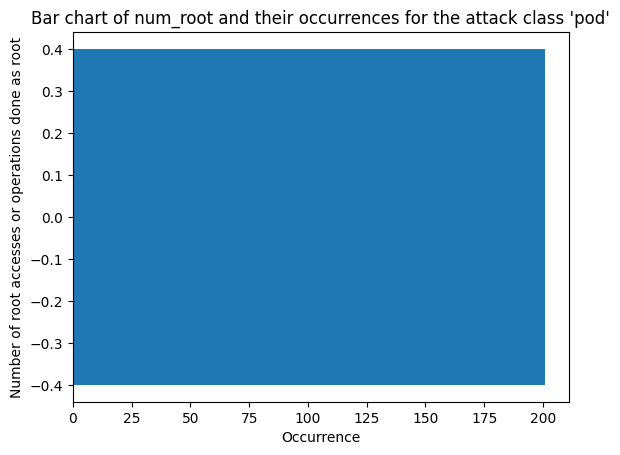

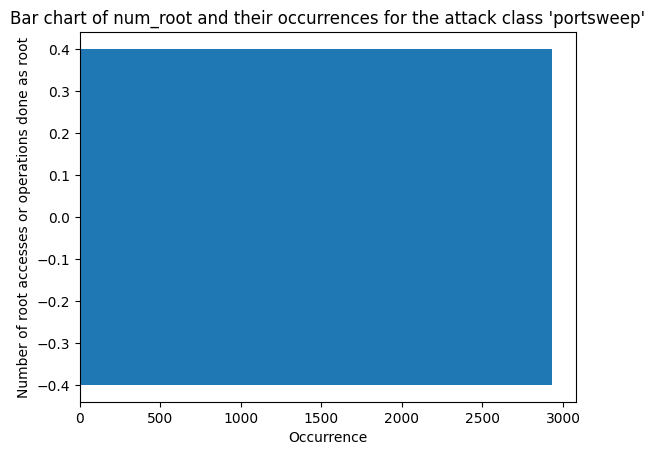

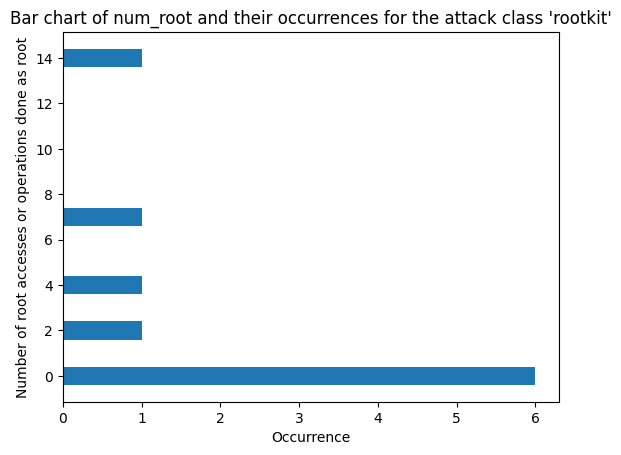

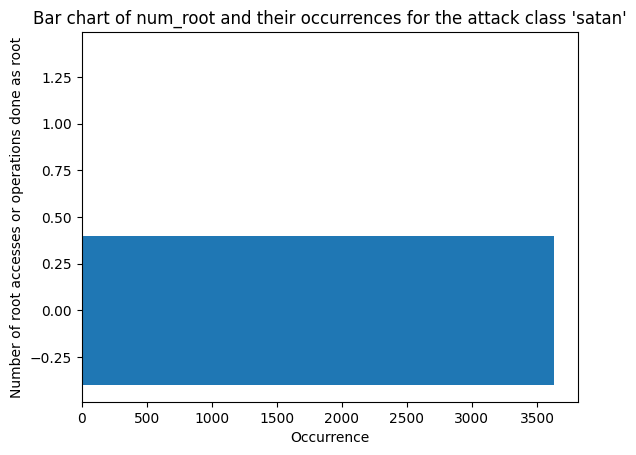

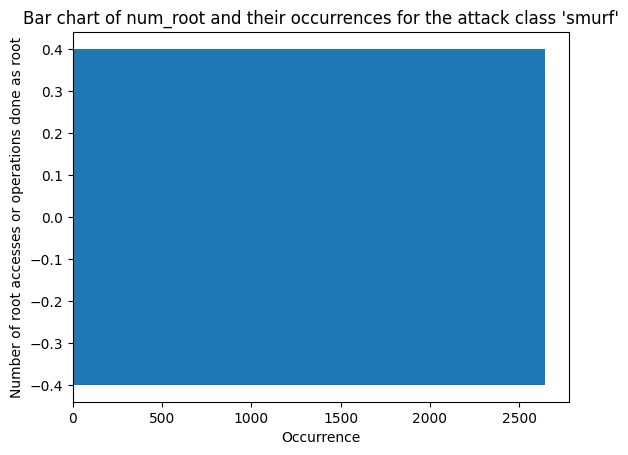

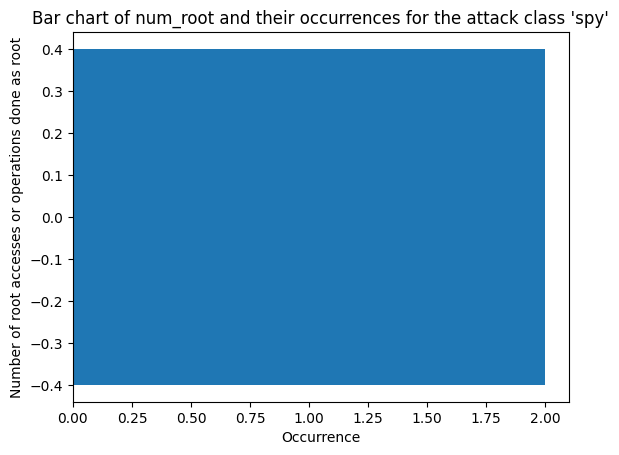

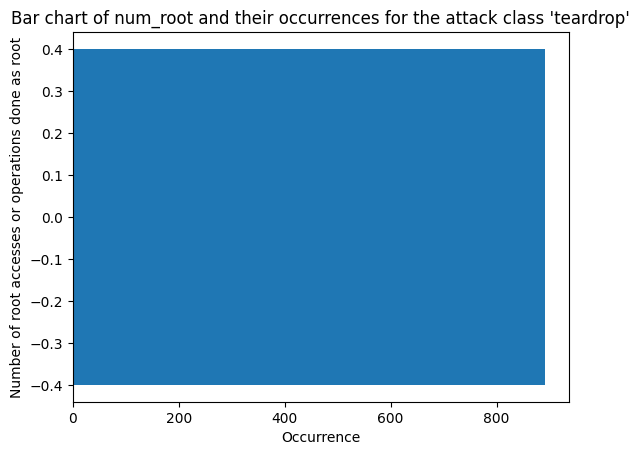

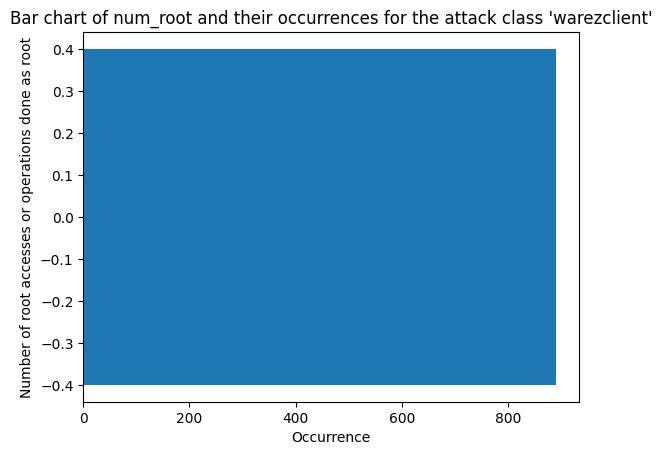

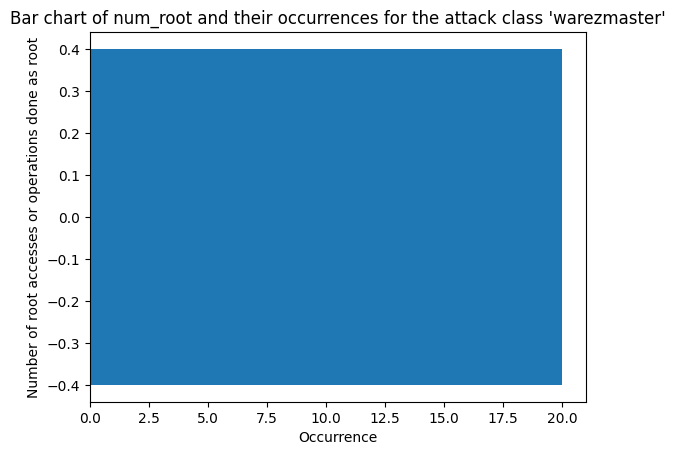

In [7]:
# Close to zero but not zero could be a decent indicator of an attack.
show_feature_in_relation_to_attack_bar_chart(labels, "num_root", "Occurrence", "Number of root accesses or operations done as root")

/tmp/ipykernel_4819/2716826374.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_4819/2716826374.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


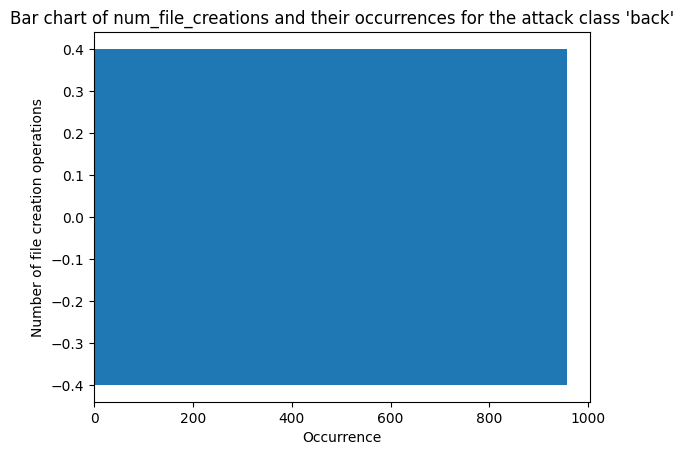

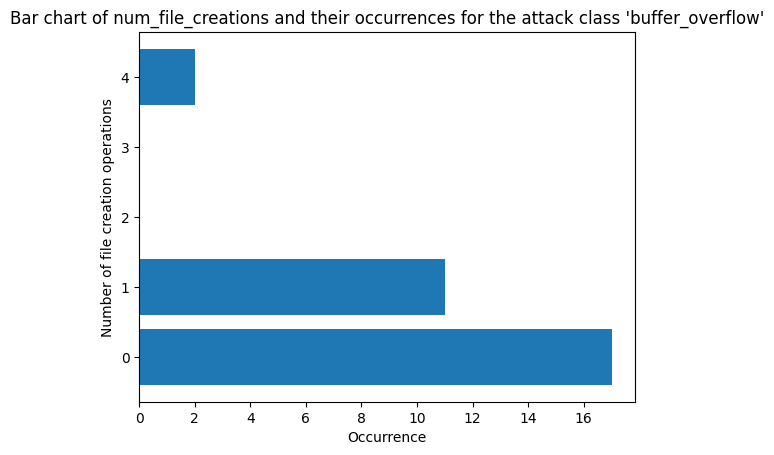

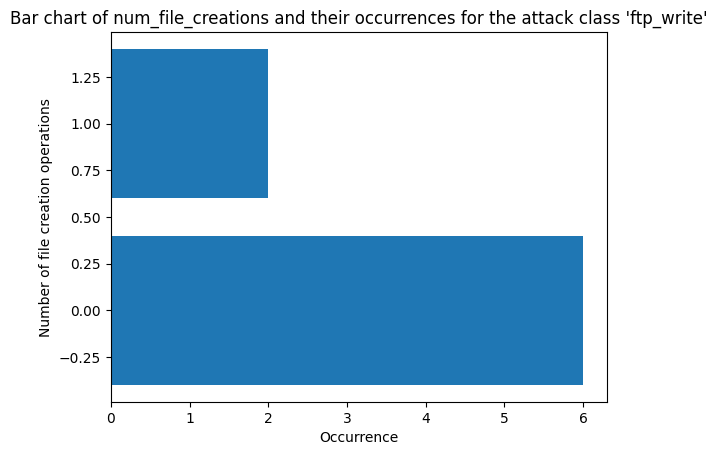

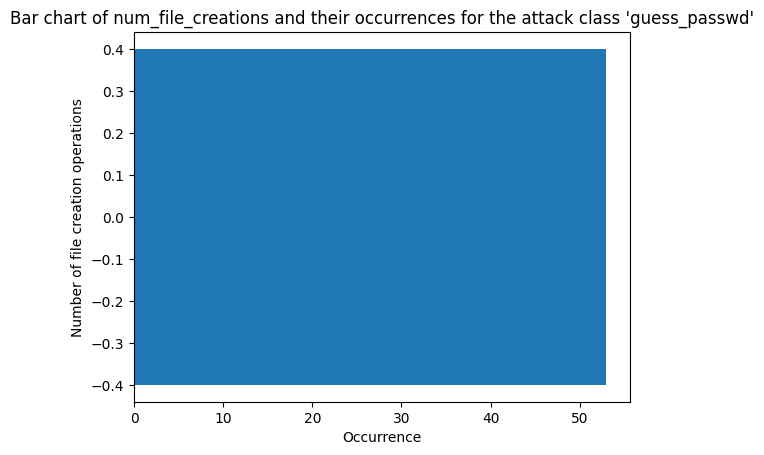

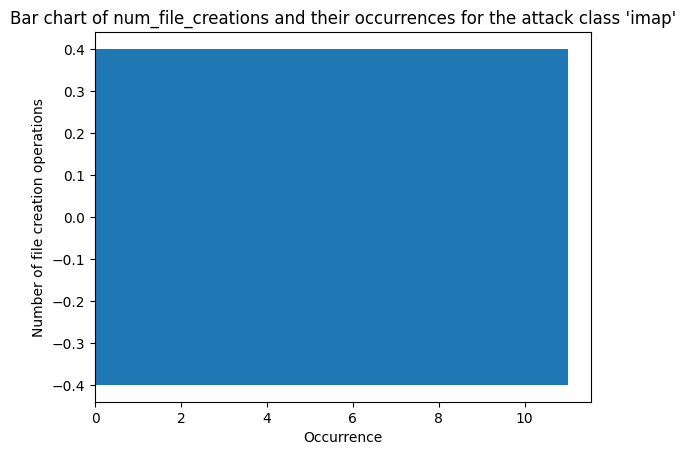

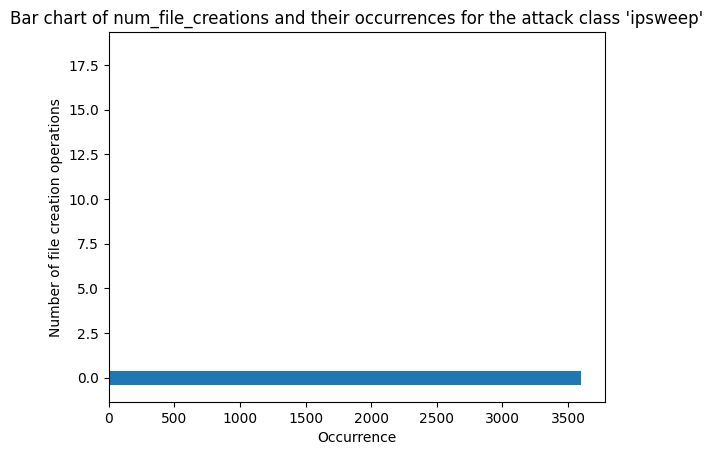

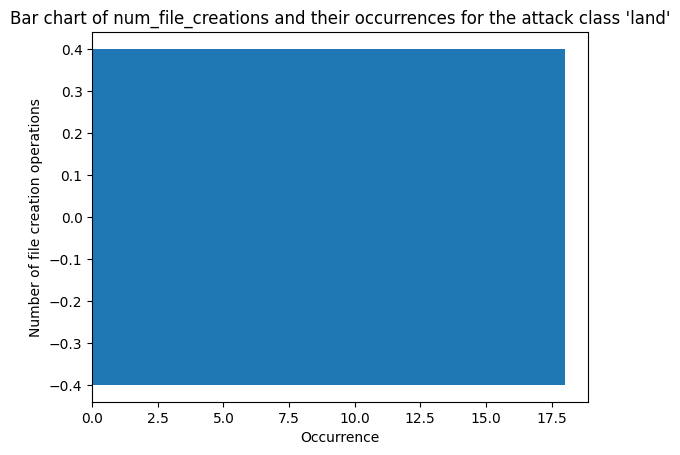

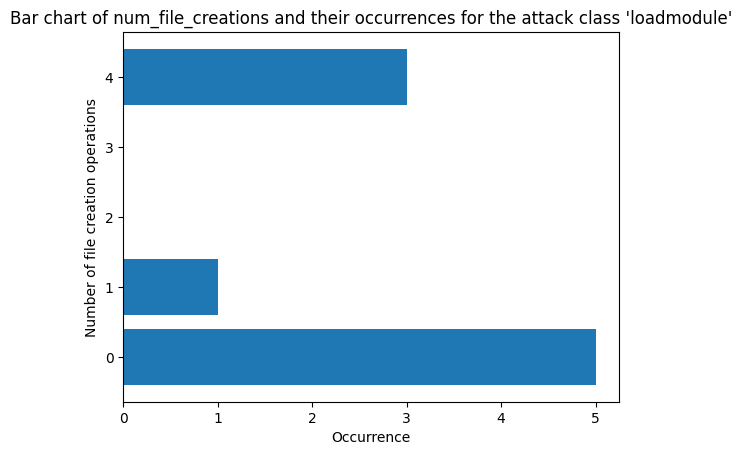

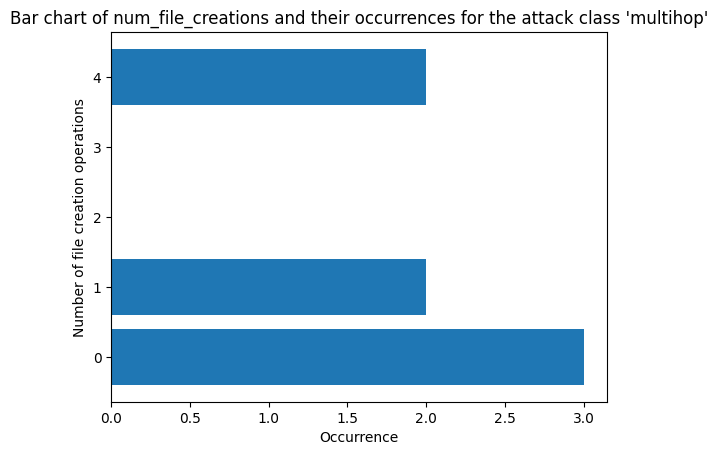

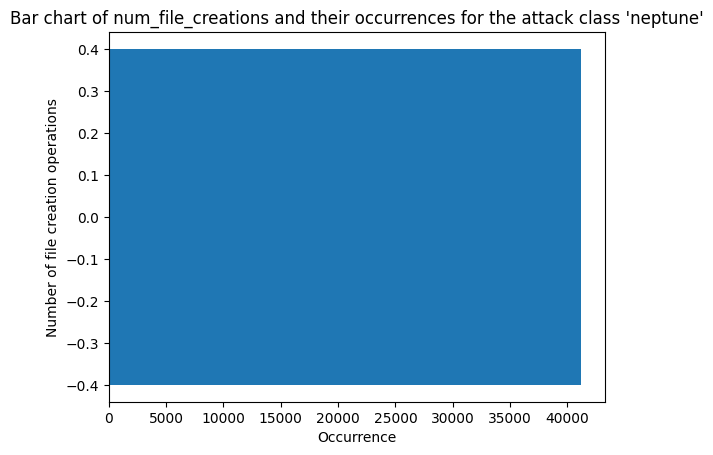

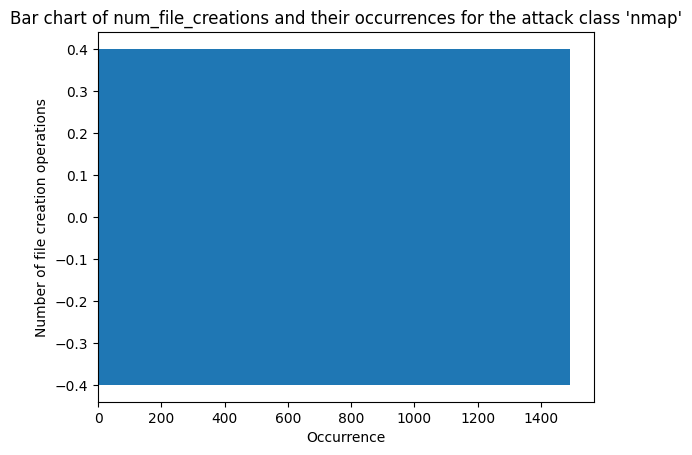

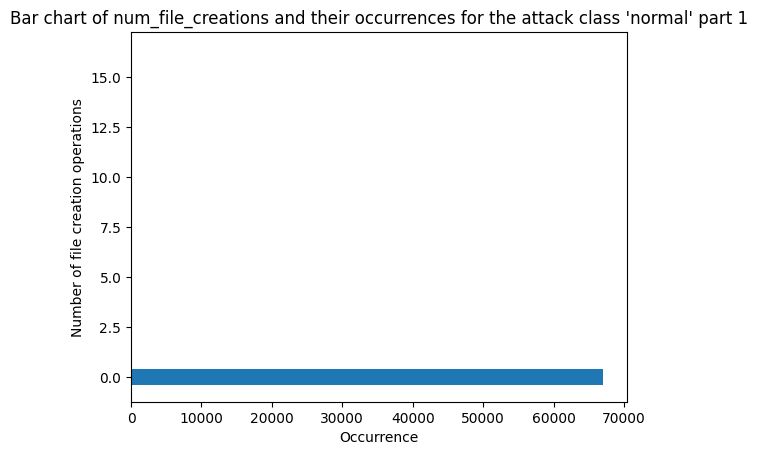

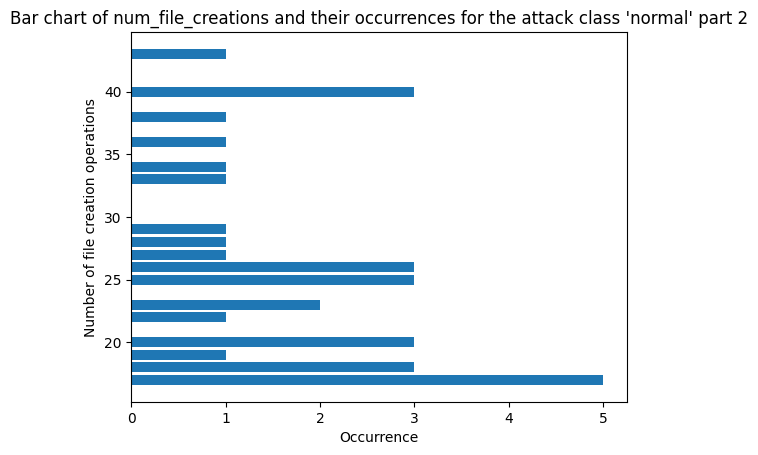

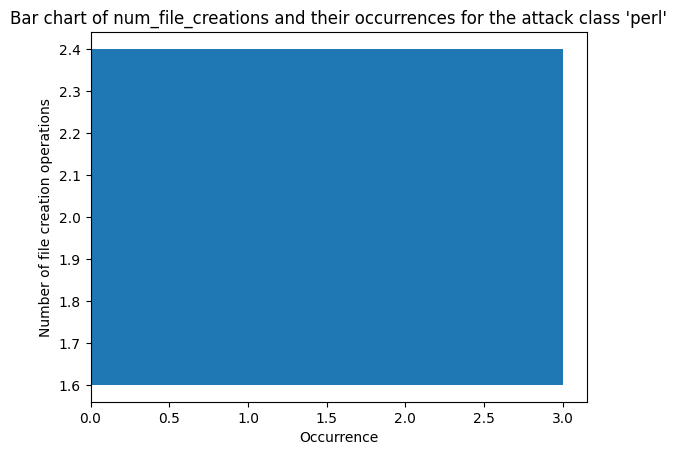

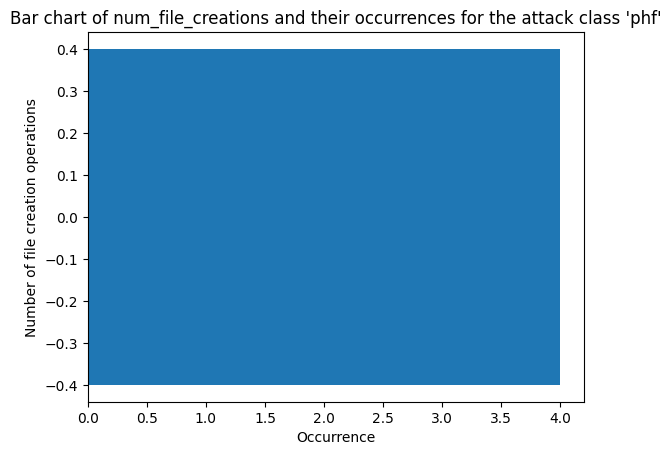

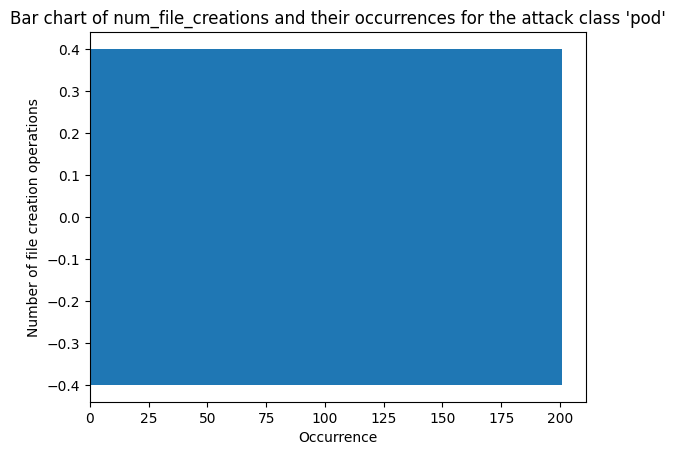

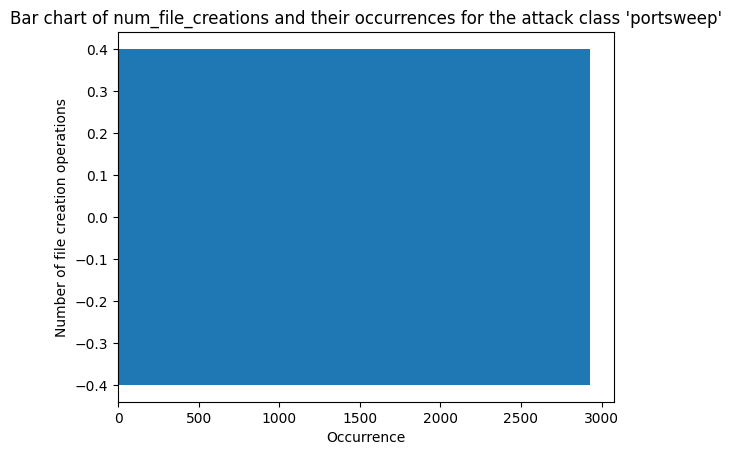

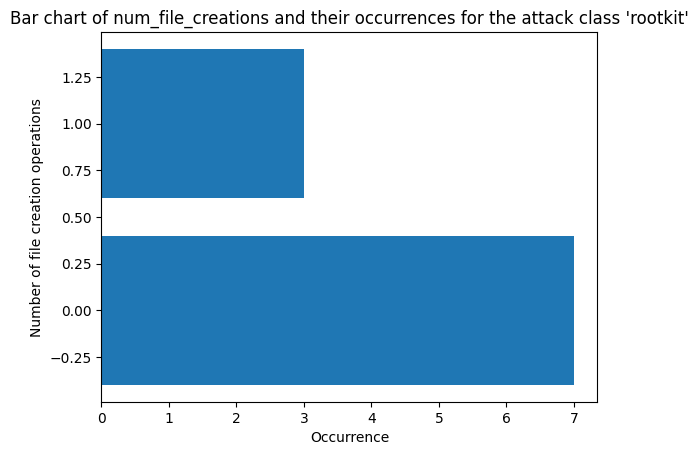

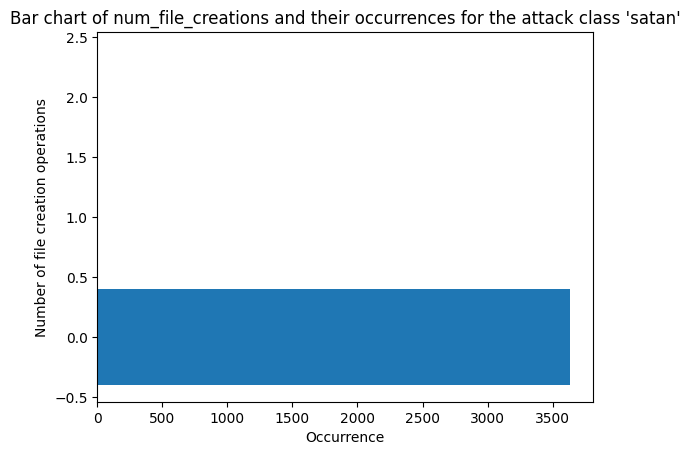

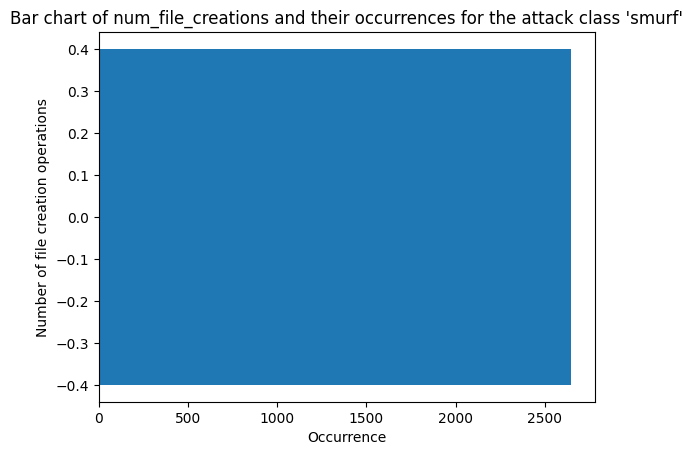

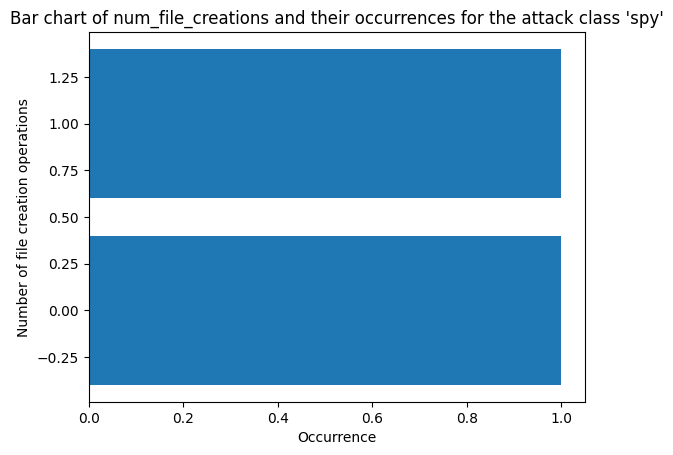

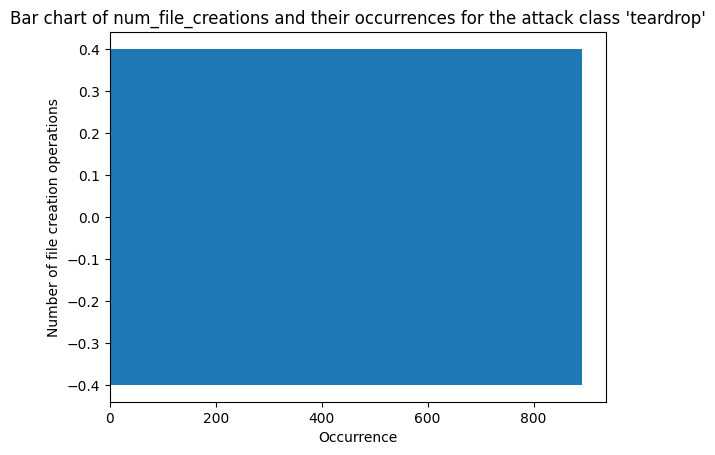

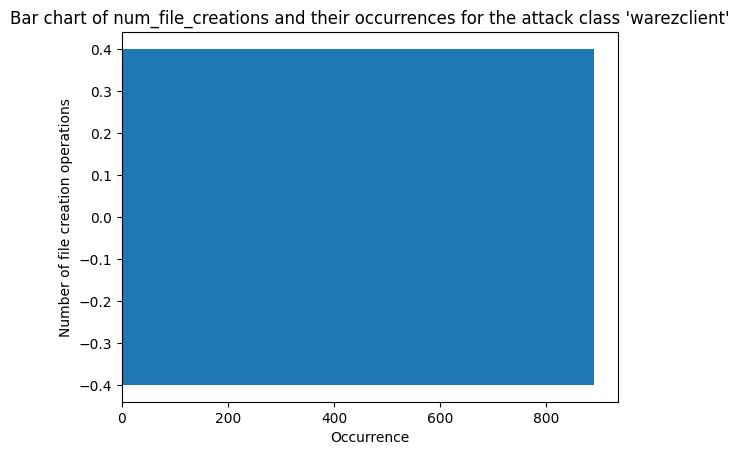

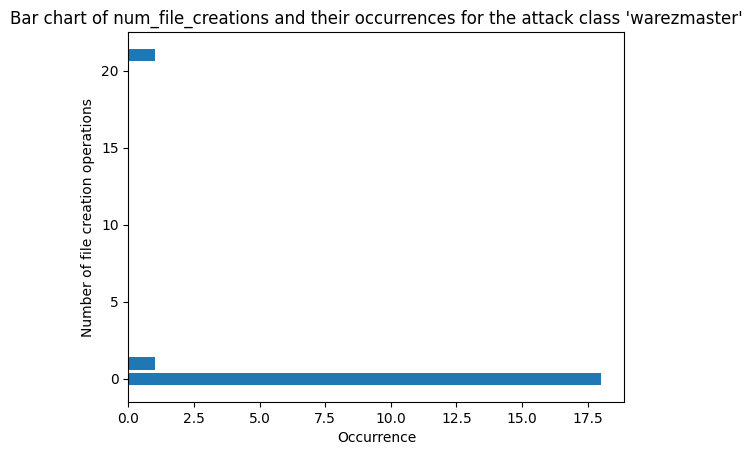

In [8]:
# Between one and four can indicate an attack 
show_feature_in_relation_to_attack_bar_chart(labels, "num_file_creations", "Occurrence", "Number of file creation operations")

/tmp/ipykernel_4819/2716826374.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_4819/2716826374.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


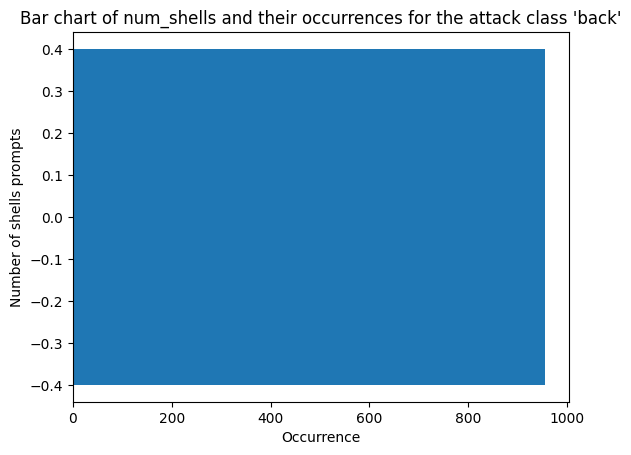

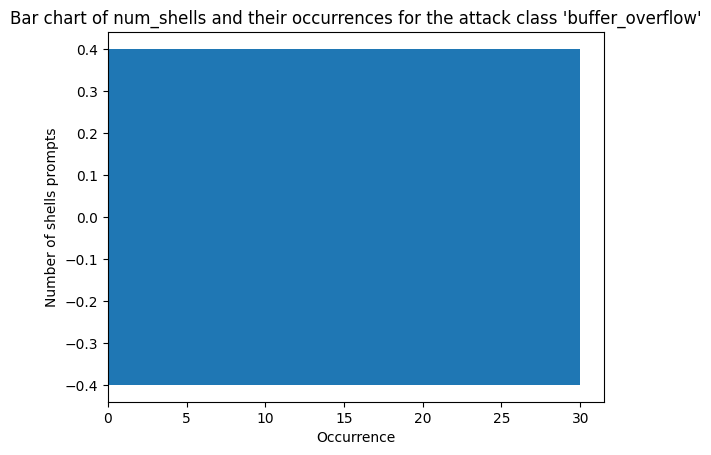

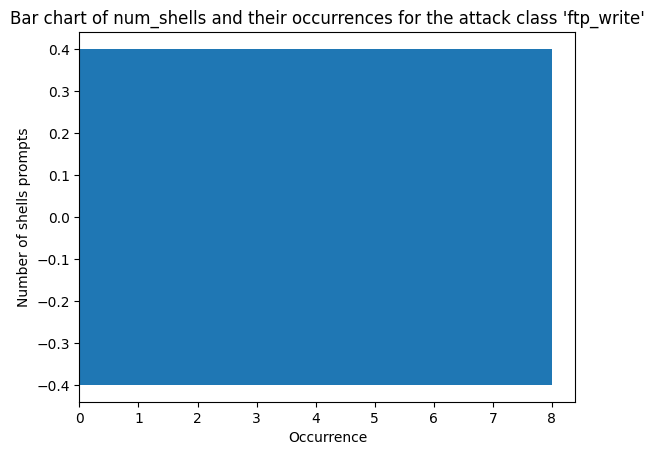

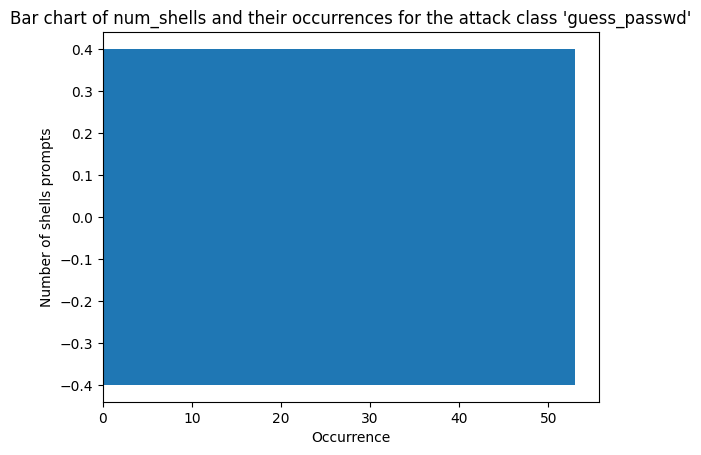

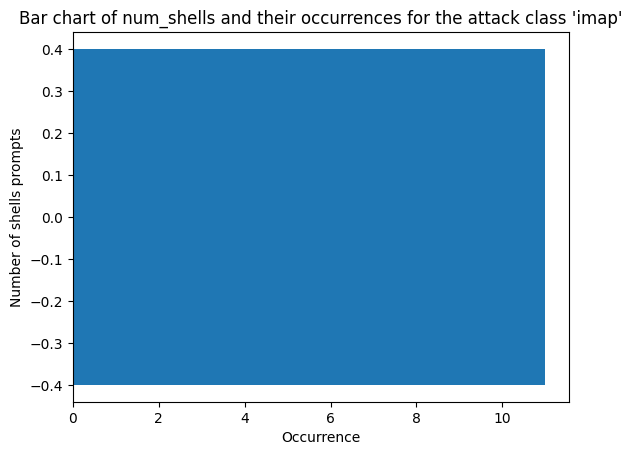

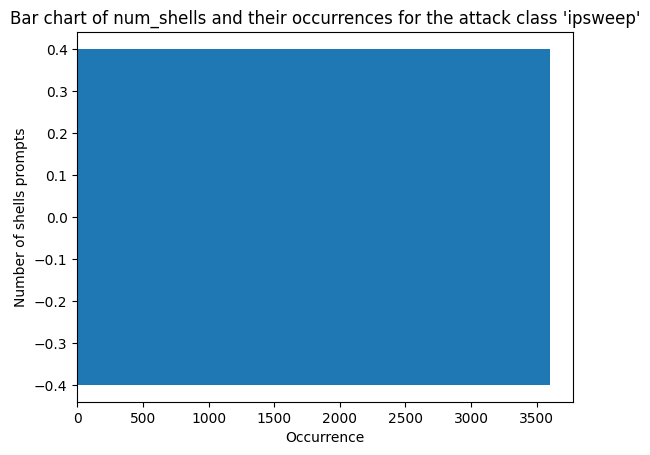

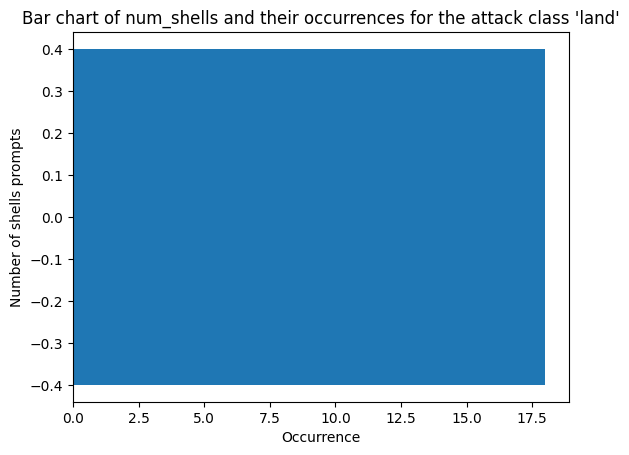

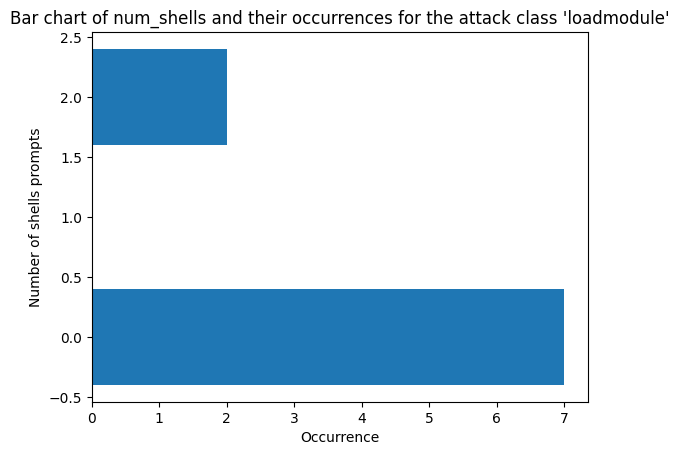

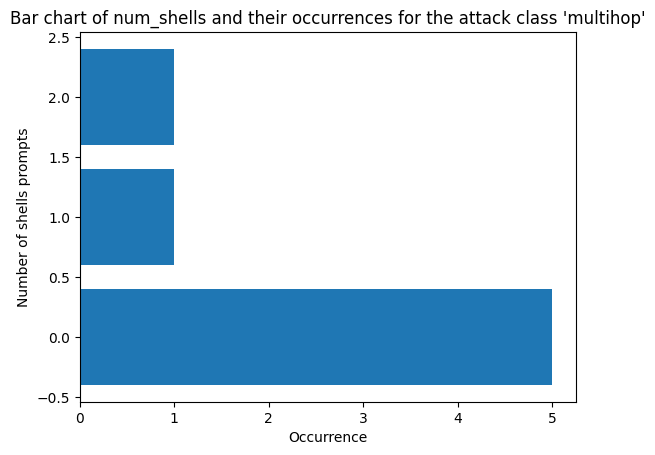

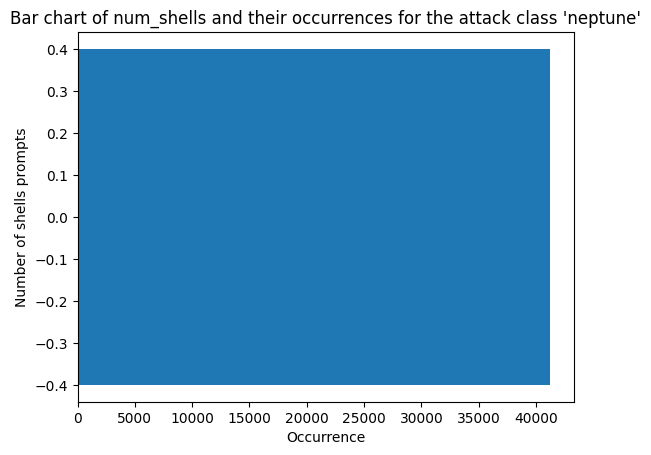

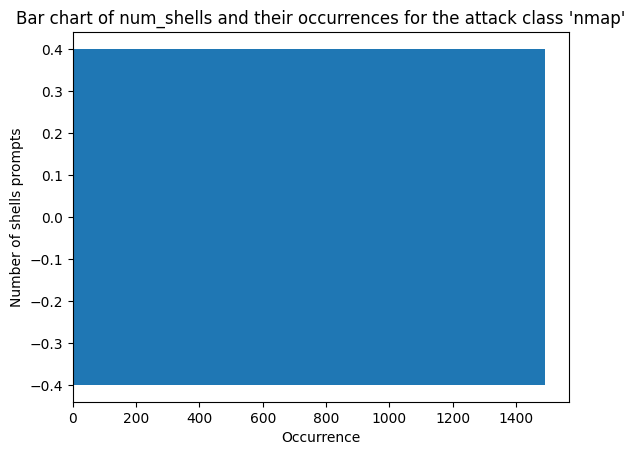

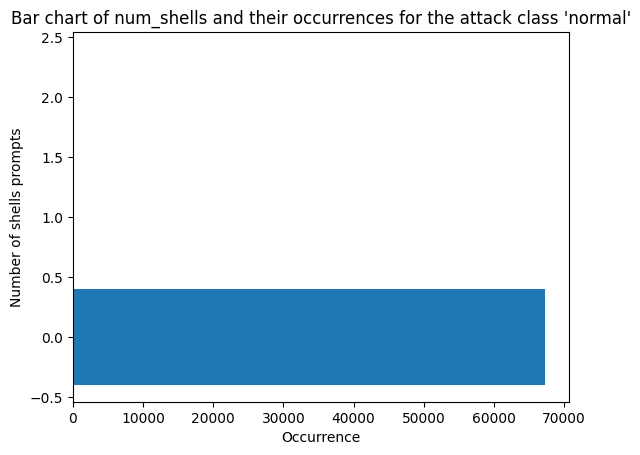

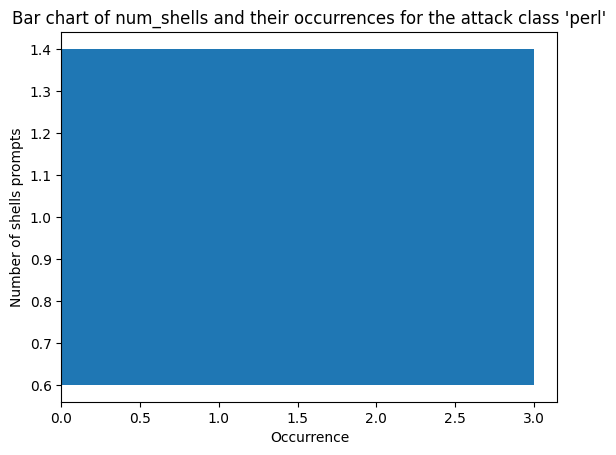

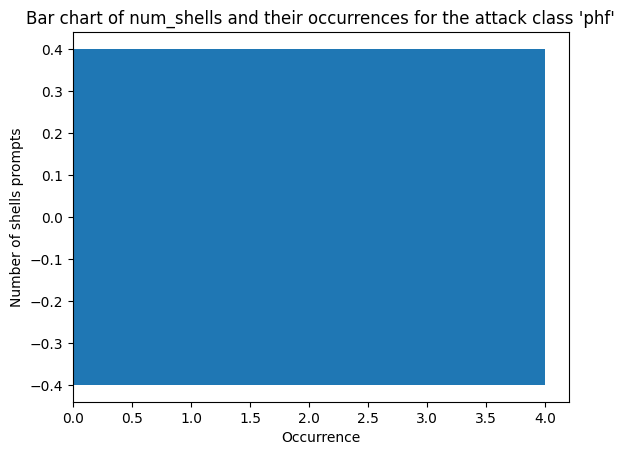

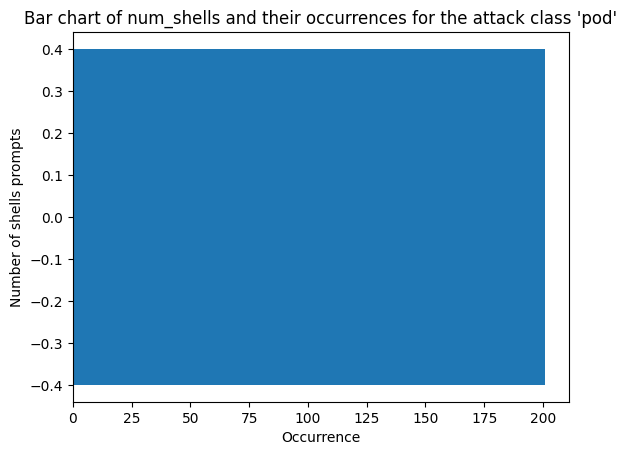

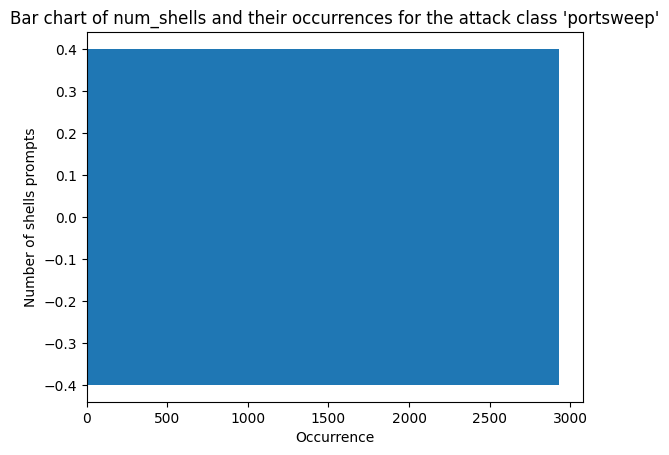

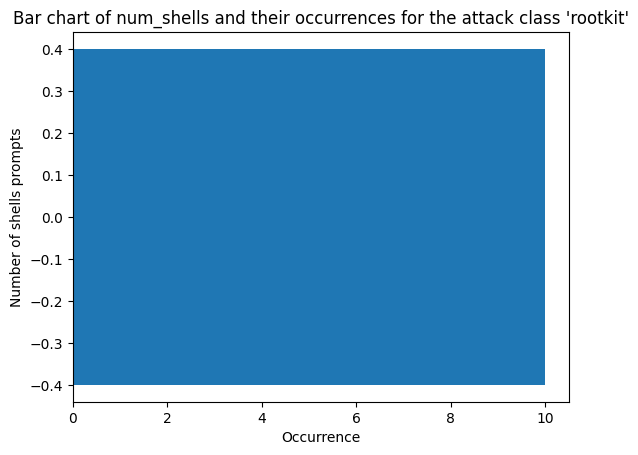

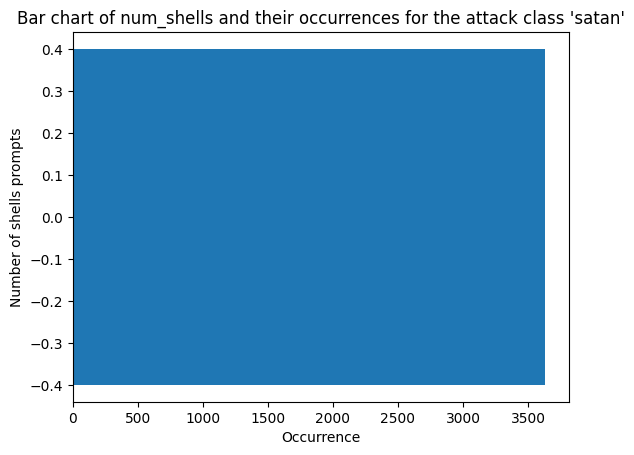

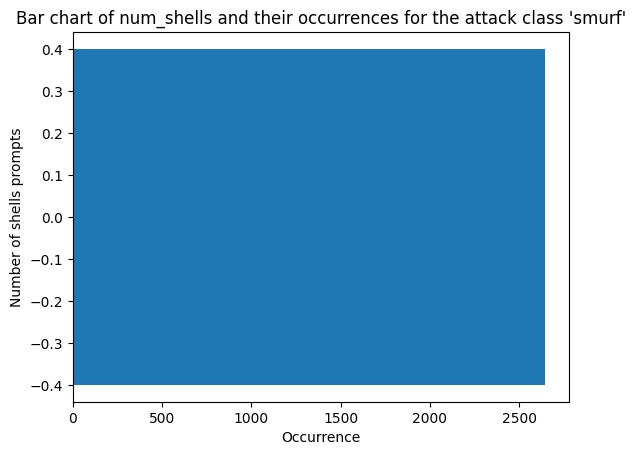

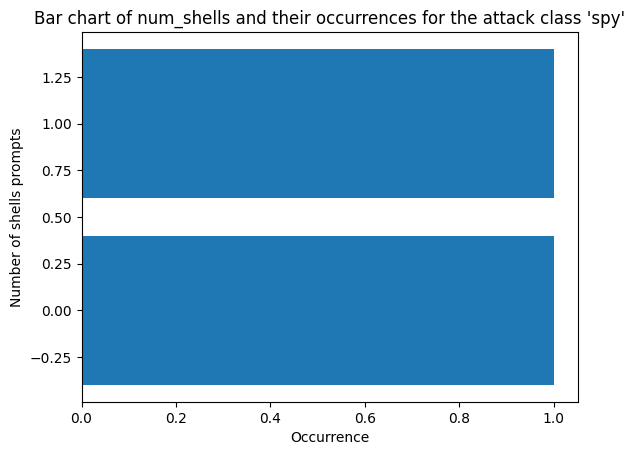

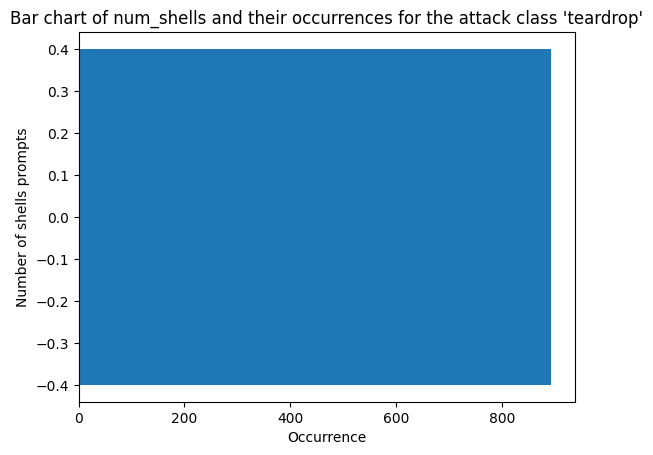

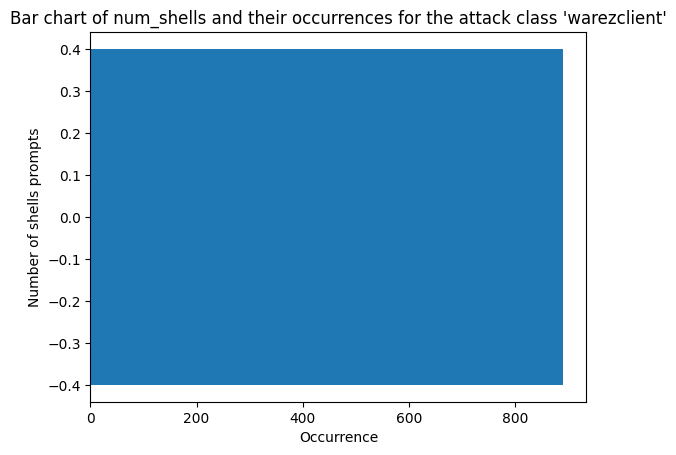

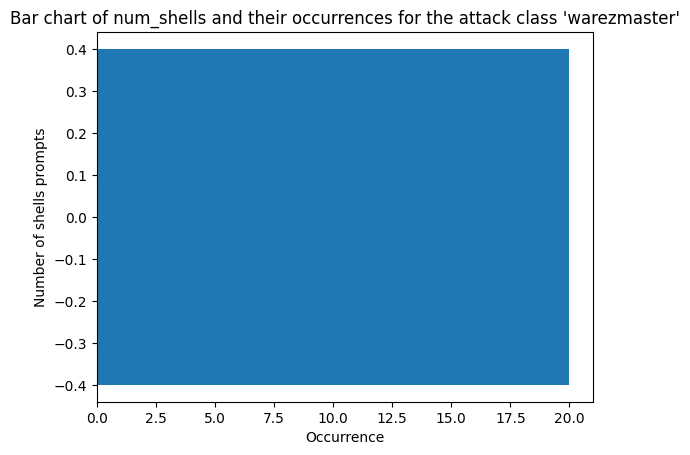

In [10]:
# No significant findings (two shells could indicate normal, loadmodule or multihop) (1 shell could indicate normal, multihop, perl or spy)
show_feature_in_relation_to_attack_bar_chart(labels, "num_shells", "Occurrence", "Number of shells prompts")